Q4 test!!!

初始采样取点

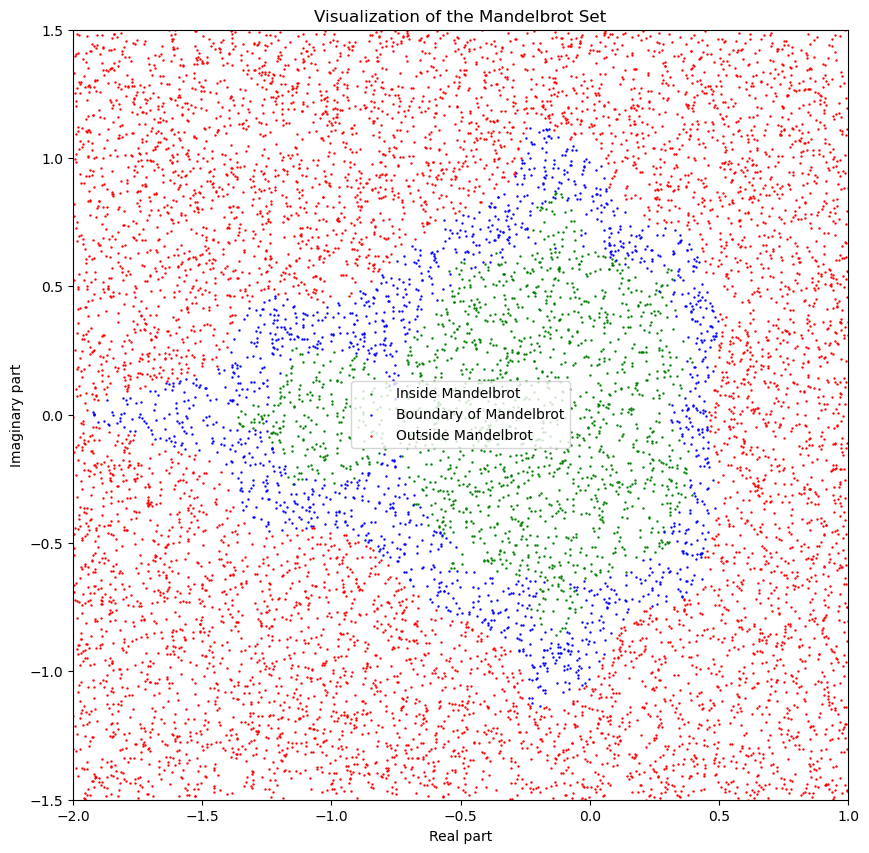

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

def random_sampling(x_range, y_range, num_samples):
    real = np.random.uniform(x_range[0], x_range[1], num_samples)
    imag = np.random.uniform(y_range[0], y_range[1], num_samples)
    return real + imag * 1j

def initial_sampling(x_range, y_range, num_samples, max_iter):
    points = random_sampling(x_range, y_range, num_samples)
    stabilities = [mandelbrot(c, max_iter) for c in points]
    inside_mandelbrot = [points[i] for i, stability in enumerate(stabilities) if  stability == max_iter]
    boundary_points = [points[i] for i, stability in enumerate(stabilities) if 5 < stability < max_iter]
    outside_mandelbrot = [points[i] for i, stability in enumerate(stabilities) if stability <= 5]
    return np.array(inside_mandelbrot),np.array(boundary_points),np.array(outside_mandelbrot)

x_range = [-2, 1]
y_range = [-1.5, 1.5]
num_samples = 10000
max_iter = 2000

#Acquired boundary point
inside_mandelbrot, boundary_points , outside_mandelbrot= initial_sampling(x_range, y_range, num_samples, max_iter)

plt.figure(figsize=(10, 10))

# Plot each set of points with different colors
plt.scatter(inside_mandelbrot.real, inside_mandelbrot.imag, color='green', s=0.5, label='Inside Mandelbrot')
plt.scatter(boundary_points.real, boundary_points.imag, color='blue', s=0.5, label='Boundary of Mandelbrot')
plt.scatter(outside_mandelbrot.real, outside_mandelbrot.imag, color='red', s=0.5, label='Outside Mandelbrot')

plt.xlim(x_range)
plt.ylim(y_range)
plt.title('Visualization of the Mandelbrot Set')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.legend()
plt.show()


区域可视化

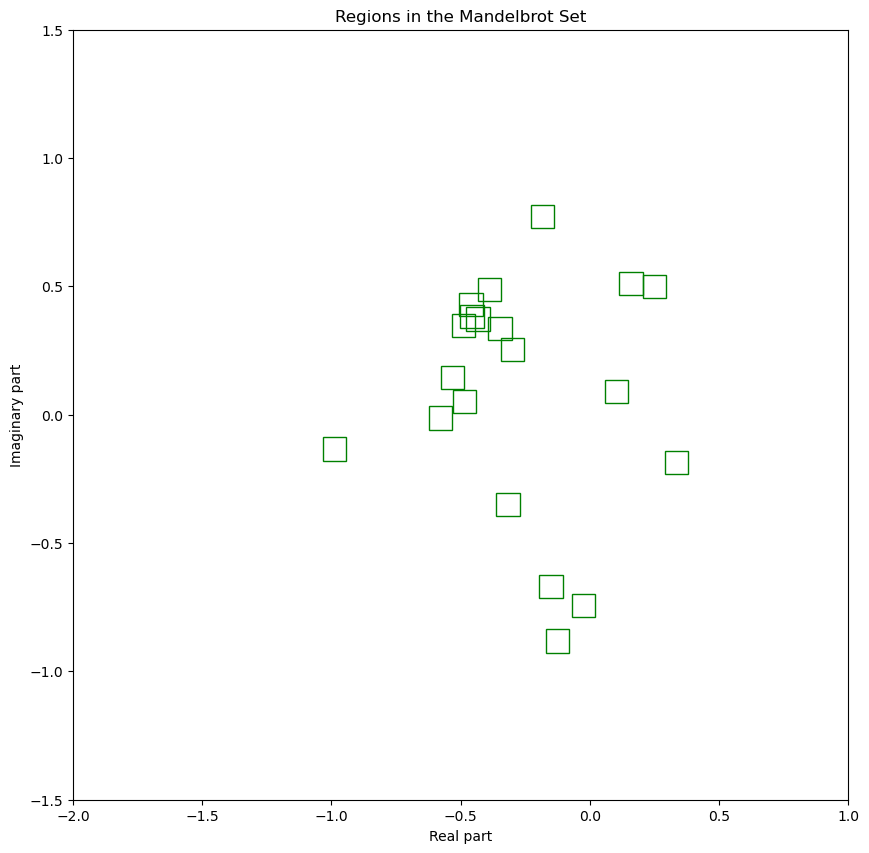

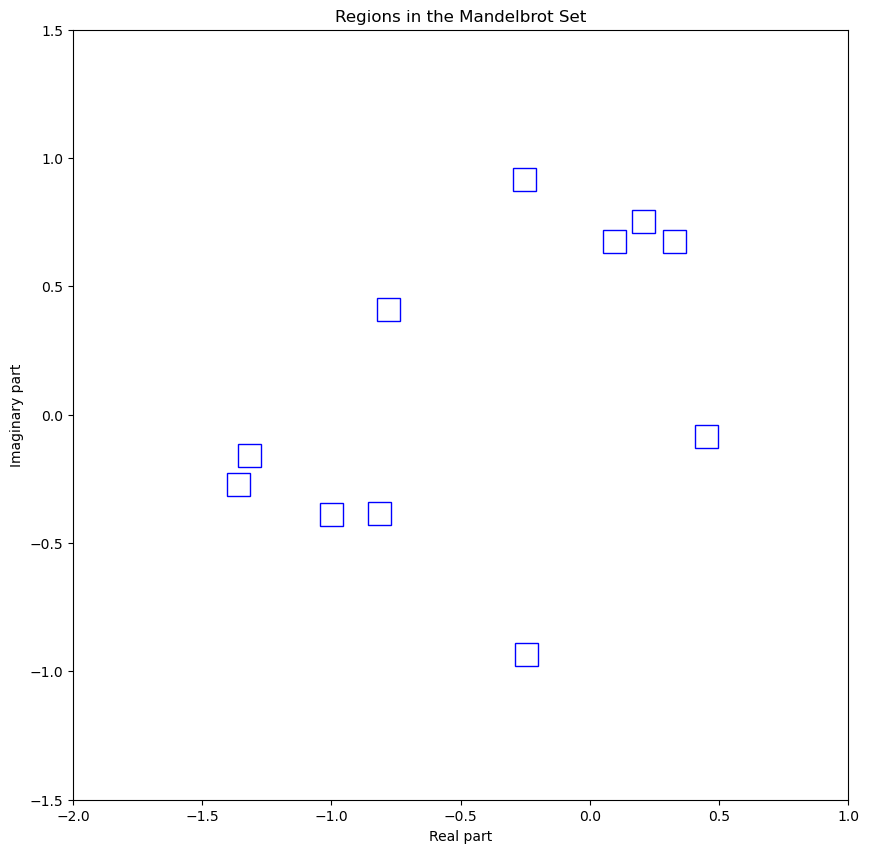

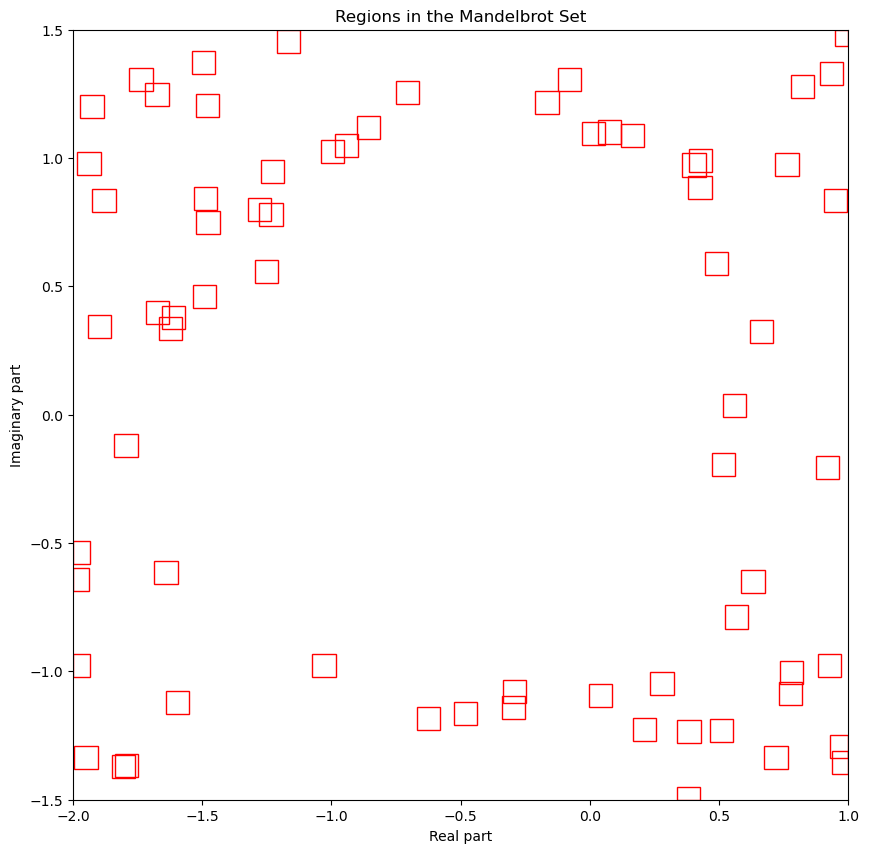

In [38]:
# Given an array of boundary points, and the size of the side length of the boundary region
def define_regions(points, side_length):
    squares = []
    half_side = side_length / 2

    for point in points:
        left = max(point.real - half_side, x_range[0])
        right = min(point.real + half_side, x_range[1])
        bottom = max(point.imag - half_side, y_range[0])
        top = min(point.imag + half_side, y_range[1])

        # 仅当方形在定义的范围内时才添加
        if left < right and bottom < top:
            squares.append([left, right, bottom, top])

    return squares


init_area_of_sample = (x_range[1] - x_range[0]) * (y_range[1] - y_range[0])
side_length = init_area_of_sample * 0.01
# Use examples
inside_mandelbrot, boundary_points , outside_mandelbrot = initial_sampling(x_range, y_range, num_samples, max_iter)

inside_mandelbrot_squares = define_regions(inside_mandelbrot, side_length)
boundary_squares = define_regions(boundary_points, side_length)  # 0.1 is the length of the side of the square area
outside_mandelbrot_squares = define_regions(outside_mandelbrot, side_length)



# Visualize the area of squares
def visualize_regions(squares, color):
    fig, ax = plt.subplots(figsize=(10, 10))

    # Draw each square
    for square in squares:
        left, right, bottom, top = square
        square_patch = plt.Rectangle((left, bottom), right - left, top - bottom, 
                                     edgecolor=color, facecolor='none')
        ax.add_patch(square_patch)

    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    plt.xlabel('Real part')
    plt.ylabel('Imaginary part')
    plt.title('Regions in the Mandelbrot Set')
    plt.show()

# Visualize each set of regions
visualize_regions(inside_mandelbrot_squares, 'green')
visualize_regions(boundary_squares, 'blue')
visualize_regions(outside_mandelbrot_squares, 'red')


合并三个区域

In [121]:
from shapely.geometry import Polygon
from shapely.geometry import box, Polygon, MultiPolygon
from shapely.ops import unary_union

x_range = [-2, 1]
y_range = [-1.5, 1.5]

# 创建一个矩形多边形
rectangle = box(x_range[0], y_range[0], x_range[1], y_range[1])

# 将矩形多边形包装在一个 MultiPolygon 中
init_space = MultiPolygon([rectangle])

def merge_squares(squares, current_sample_space=init_space):
    polygons = [Polygon([(left, bottom), (right, bottom), (right, top), (left, top)]) for left, right, bottom, top in squares]
    merged_area = unary_union(polygons)

    # 使用intersection方法获取合并区域与current_sample_space的交集
    intersection = merged_area.intersection(current_sample_space)

    if isinstance(intersection, MultiPolygon):
        return intersection
    elif isinstance(intersection, Polygon):
        return MultiPolygon([intersection])
    else:
        return MultiPolygon([])  # 返回空的MultiPolygon对象
    
# 计算每个集合
inside_space = merge_squares(inside_mandelbrot_squares, init_space)
boundary_space = merge_squares(boundary_squares, init_space)
outside_space = merge_squares(outside_mandelbrot_squares, init_space)

print(f"Inside Mandelbrot Set Merged Area: {inside_space.area}")
print(f"Boundary of Mandelbrot Set Merged Area: {boundary_space.area}")
print(f"Outside Mandelbrot Set Merged Area: {outside_space.area}")

print(inside_space)
print(inside_space.area + boundary_space.area + outside_space.area)


Inside Mandelbrot Set Merged Area: 1.785584413263235
Boundary of Mandelbrot Set Merged Area: 1.8416606766712733
Outside Mandelbrot Set Merged Area: 6.473368468415418
MULTIPOLYGON (((-1.2607430723542792 -0.1091229779517836, -1.2857347547516529 -0.1091229779517836, -1.2857347547516529 -0.0683418541684565, -1.3025657758126843 -0.0683418541684565, -1.3025657758126843 -0.0762911254718173, -1.3925657758126841 -0.0762911254718173, -1.3925657758126841 -0.0402154688623374, -1.3946560267129566 -0.0402154688623374, -1.3946560267129566 0.0497845311376626, -1.3920996254697025 0.0497845311376626, -1.3920996254697025 0.0977187662745852, -1.3020996254697026 0.0977187662745852, -1.3020996254697026 0.0798140145272422, -1.2715227604642299 0.0798140145272422, -1.2715227604642299 0.136871066126191, -1.2389222172611563 0.136871066126191, -1.2389222172611563 0.189574576378111, -1.1625116853604736 0.189574576378111, -1.1625116853604736 0.1980673348150383, -1.1958441544625005 0.1980673348150383, -1.19584415446

处理重合部分并补充没有取样到的部分

In [122]:
def adjust_spaces(inside_space, boundary_space, outside_space, init_space):
    # Step 1: Add intersection with boundary_space to boundary_space
    boundary_inside_intersection = boundary_space.intersection(inside_space)
    boundary_outside_intersection = boundary_space.intersection(outside_space)
    boundary_space = boundary_space.union(boundary_inside_intersection).union(boundary_outside_intersection)

    # Step 2: Remove intersection with boundary_space from inside_space and outside_space
    inside_space = inside_space.difference(boundary_inside_intersection)
    outside_space = outside_space.difference(boundary_outside_intersection)

    # Step 3: Add intersection between inside_space and outside_space to boundary_space
    inside_outside_intersection = inside_space.intersection(outside_space)
    boundary_space = boundary_space.union(inside_outside_intersection)

    # Remove intersections from inside_space and outside_space
    inside_space = inside_space.difference(inside_outside_intersection)
    outside_space = outside_space.difference(inside_outside_intersection)

    # Step 4: Calculate the difference between the union of all spaces and init_space
    union_of_spaces = inside_space.union(boundary_space).union(outside_space)
    difference = union_of_spaces.difference(init_space)

    # Step 5: Add the difference to boundary_space
    boundary_space = boundary_space.union(difference)
    
    return inside_space, boundary_space, outside_space

# Adjust the spaces according to the rules
adjusted_inside_space, adjusted_boundary_space, adjusted_outside_space = adjust_spaces(inside_space, boundary_space, outside_space, init_space)

# Calculate the area of adjusted spaces
adjusted_inside_area = adjusted_inside_space.area
adjusted_boundary_area = adjusted_boundary_space.area
adjusted_outside_area = adjusted_outside_space.area

print(f"Adjusted Inside Mandelbrot Set Area: {adjusted_inside_area}")
print(f"Adjusted Boundary of Mandelbrot Set Area: {adjusted_boundary_area}")
print(f"Adjusted Outside Mandelbrot Set Area: {adjusted_outside_area}")

print(adjusted_inside_space)
print(adjusted_outside_space)
print(adjusted_inside_space.area+adjusted_boundary_space.area+adjusted_outside_space.area)


Adjusted Inside Mandelbrot Set Area: 1.2312739278896996
Adjusted Boundary of Mandelbrot Set Area: 1.8416606766712704
Adjusted Outside Mandelbrot Set Area: 5.924839802957534
MULTIPOLYGON (((-0.8265198746887324 0.1397064297709769, -0.8265198746887324 0.1376657453024457, -0.8232251013693227 0.1376657453024457, -0.8232251013693227 0.0913646228238198, -0.812728357629748 0.0913646228238198, -0.812728357629748 0.0499489561888961, -0.722728357629748 0.0499489561888961, -0.722728357629748 0.0738127533206997, -0.7116548693915278 0.0738127533206997, -0.7116548693915278 0.1010077680017915, -0.7111825956510577 0.1010077680017915, -0.7111825956510577 0.1197047343834514, -0.6967775523004492 0.1197047343834514, -0.6967775523004492 0.1765307497917434, -0.6947205240698348 0.1765307497917434, -0.6947205240698348 0.1982630598981067, -0.6812376338171696 0.1982630598981067, -0.6812376338171696 0.2150475531509274, -0.6786220531690191 0.2150475531509274, -0.6786220531690191 0.2160398955370905, -0.677737092948

可视化第一次迭代后的结果

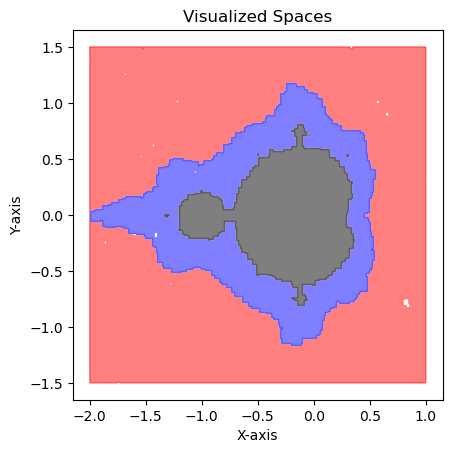

In [133]:
from shapely.geometry import Polygon, MultiPolygon
import matplotlib.pyplot as plt

# 更新的可视化函数，允许指定颜色
def visualize_space(merged_rectangles, ax, color='blue'):
    # 如果是单个 Polygon，将其放入一个列表中
    if isinstance(merged_rectangles, Polygon):
        merged_rectangles = [merged_rectangles]
    # 如果是 MultiPolygon，提取每个 Polygon
    elif isinstance(merged_rectangles, MultiPolygon):
        merged_rectangles = [polygon for polygon in merged_rectangles.geoms]

    # 绘制并填充每个多边形
    for polygon in merged_rectangles:
        x, y = polygon.exterior.xy
        ax.fill(x, y, color=color, alpha=0.5)  # 填充外部多边形
          # 绘制内部多边形（空洞）
        for interior in polygon.interiors:
            x, y = interior.xy
            ax.fill(x, y, color='white', alpha=1)  # 使用白色填充内部多边形以创建空洞效果

# 创建一个新的绘图
fig, ax = plt.subplots()

# 可视化三个区域

visualize_space(adjusted_outside_space, ax, color='red')    # 外部空间为红色
visualize_space(adjusted_boundary_space, ax, color='blue')  # 边界空间为蓝色
visualize_space(adjusted_inside_space, ax, color='black')   # 内部空间为绿色

# 设置图像的x和y边界
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Visualized Spaces')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


进行下一步计算

点采样

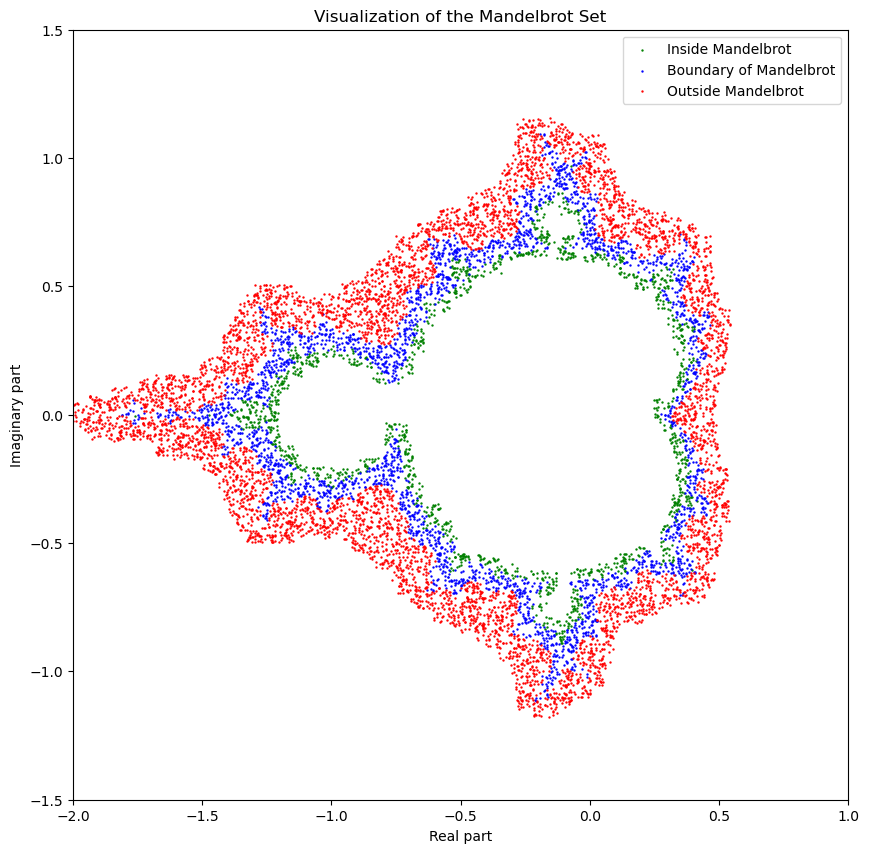

In [154]:
import numpy as np
from shapely.geometry import Point


def random_sampling_within_multipolygon(multipolygon, num_samples):
    """在给定的 MultiPolygon 范围内随机生成点"""
    minx, miny, maxx, maxy = multipolygon.bounds
    points = []
    while len(points) < num_samples:
        real = np.random.uniform(minx, maxx)
        imag = np.random.uniform(miny, maxy)
        point = Point(real, imag)  # 创建一个 Point 对象
        if multipolygon.contains(point):
            complex_point = real + imag * 1j  # 创建一个复数
            points.append(complex_point)
    return points


def random_sampling(multipolygon, num_samples, max_iter, iteration_threshold):
    points = random_sampling_within_multipolygon(multipolygon, num_samples)
    stabilities = [mandelbrot(c, max_iter) for c in points]
    inside_mandelbrot = [points[i] for i, stability in enumerate(stabilities) if stability == max_iter]
    boundary_points = [points[i] for i, stability in enumerate(stabilities) if iteration_threshold < stability < max_iter]
    outside_mandelbrot = [points[i] for i, stability in enumerate(stabilities) if stability <= iteration_threshold]
    return np.array(inside_mandelbrot), np.array(boundary_points), np.array(outside_mandelbrot)

num_samples = 10000
max_iter = 2000
iteration_threshold = 10
current_sample_space = adjusted_boundary_space
# 进行采样
inside_mandelbrot, boundary_points , outside_mandelbrot= random_sampling(adjusted_boundary_space, num_samples, max_iter, iteration_threshold)

plt.figure(figsize=(10, 10))

# Plot each set of points with different colors
plt.scatter(inside_mandelbrot.real, inside_mandelbrot.imag, color='green', s=0.5, label='Inside Mandelbrot')
plt.scatter(boundary_points.real, boundary_points.imag, color='blue', s=0.5, label='Boundary of Mandelbrot')
plt.scatter(outside_mandelbrot.real, outside_mandelbrot.imag, color='red', s=0.5, label='Outside Mandelbrot')

plt.xlim(x_range)
plt.ylim(y_range)
plt.title('Visualization of the Mandelbrot Set')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.legend()
plt.show()



区域可视化

In [155]:
# Given an array of boundary points, and the size of the side length of the boundary region
def define_regions(points, side_length):
    squares = []
    half_side = side_length / 2

    for point in points:
        left = max(point.real - half_side, x_range[0])
        right = min(point.real + half_side, x_range[1])
        bottom = max(point.imag - half_side, y_range[0])
        top = min(point.imag + half_side, y_range[1])

        # 仅当方形在定义的范围内时才添加
        if left < right and bottom < top:
            squares.append([left, right, bottom, top])

    return squares

num_samples = 20000
init_area_of_sample = current_sample_space.area
print(current_sample_space.area)
side_length = init_area_of_sample * 0.01
# Use examples
inside_mandelbrot, boundary_points , outside_mandelbrot= random_sampling(adjusted_boundary_space, num_samples, max_iter, iteration_threshold)

inside_mandelbrot_squares = define_regions(inside_mandelbrot, side_length)
boundary_squares = define_regions(boundary_points, side_length)  # 0.1 is the length of the side of the square area
outside_mandelbrot_squares = define_regions(outside_mandelbrot, side_length)



# Visualize the area of squares
def visualize_regions(squares, color):
    fig, ax = plt.subplots(figsize=(10, 10))

    # Draw each square
    for square in squares:
        left, right, bottom, top = square
        square_patch = plt.Rectangle((left, bottom), right - left, top - bottom, 
                                     edgecolor=color, facecolor='none')
        ax.add_patch(square_patch)

    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    plt.xlabel('Real part')
    plt.ylabel('Imaginary part')
    plt.title('Regions in the Mandelbrot Set')
    plt.show()

# Visualize each set of regions
visualize_regions(inside_mandelbrot_squares, 'green')
visualize_regions(boundary_squares, 'blue')
visualize_regions(outside_mandelbrot_squares, 'red')


1.8424860395099811


合并区域

In [156]:
inside_space = merge_squares(inside_mandelbrot_squares,current_sample_space)
boundary_space = merge_squares(boundary_squares,current_sample_space)
outside_space = merge_squares(outside_mandelbrot_squares,current_sample_space)

print(f"Inside Mandelbrot Set Merged Area: {inside_space.area}")
print(f"Boundary of Mandelbrot Set Merged Area: {boundary_space.area}")
print(f"Outside Mandelbrot Set Merged Area: {outside_space.area}")

print(inside_space.area + boundary_space.area + outside_space.area)

Inside Mandelbrot Set Merged Area: 0.3117897787338945
Boundary of Mandelbrot Set Merged Area: 0.6029225134868056
Outside Mandelbrot Set Merged Area: 1.0792230209146447
1.9939353131353448


处理重合

In [157]:
# Adjust the spaces according to the rules
adjusted_inside_space, adjusted_boundary_space, adjusted_outside_space = adjust_spaces(inside_space, boundary_space, outside_space,current_sample_space)

# Calculate the area of adjusted spaces
adjusted_inside_area = adjusted_inside_space.area
adjusted_boundary_area = adjusted_boundary_space.area
adjusted_outside_area = adjusted_outside_space.area

print(f"Adjusted Inside Mandelbrot Set Area: {adjusted_inside_area}")
print(f"Adjusted Boundary of Mandelbrot Set Area: {adjusted_boundary_area}")
print(f"Adjusted Outside Mandelbrot Set Area: {adjusted_outside_area}")

print(adjusted_inside_space.area+adjusted_boundary_space.area+adjusted_outside_space.area)

Adjusted Inside Mandelbrot Set Area: 0.2133528664722604
Adjusted Boundary of Mandelbrot Set Area: 0.6029299018518937
Adjusted Outside Mandelbrot Set Area: 0.9717767954552782
1.788059563779432


可视化

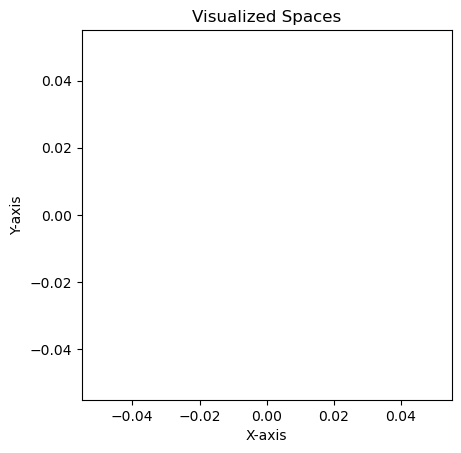

In [29]:
from shapely.geometry import Polygon, MultiPolygon
import matplotlib.pyplot as plt

# 更新的可视化函数，允许指定颜色
def visualize_space(merged_rectangles, ax, color='blue', hole_color='white'):
    # 如果是单个 Polygon，将其放入一个列表中
    if isinstance(merged_rectangles, Polygon):
        merged_rectangles = [merged_rectangles]
    # 如果是 MultiPolygon，提取每个 Polygon
    elif isinstance(merged_rectangles, MultiPolygon):
        merged_rectangles = [polygon for polygon in merged_rectangles.geoms]

    # 绘制并填充每个多边形
    for polygon in merged_rectangles:
        x, y = polygon.exterior.xy
        ax.fill(x, y, color=color, alpha=0.5)  

# 创建一个新的绘图
fig, ax = plt.subplots()

# 可视化三个区域
visualize_space(adjusted_inside_space, ax, color='green')   # 内部空间为绿色
visualize_space(adjusted_boundary_space, ax, color='blue')  # 边界空间为蓝色
visualize_space(adjusted_outside_space, ax, color='red')    # 外部空间为红色

# 设置图像的x和y边界
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Visualized Spaces')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


Q4 * 综合函数：

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box, MultiPolygon
from shapely.geometry import Polygon, MultiPolygon
from shapely.geometry import Point
from shapely.ops import unary_union
import time

In [89]:
def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

def init_sample_area(x_range,y_range):
    # 创建一个矩形多边形
    rectangle = box(x_range[0], y_range[0], x_range[1], y_range[1])

    # 将矩形多边形包装在一个 MultiPolygon 中
    multipolygon = MultiPolygon([rectangle])
    return multipolygon



def random_sampling_within_multipolygon(multipolygon, num_samples):
    polygons = [multipolygon] if isinstance(multipolygon, Polygon) else multipolygon.geoms
    #print(len(polygons))
    # 确定每个子多边形的样本数
    total_area = sum(p.area for p in polygons)
    sample_counts = [int(p.area / total_area * num_samples) for p in polygons]

    points = []
    for polygon, num_samples_in_polygon in zip(polygons, sample_counts):
        minx, miny, maxx, maxy = polygon.bounds
        samples_in_current_polygon = 0
        t = 0
        while samples_in_current_polygon < num_samples_in_polygon:
            t += 1
            real = np.random.uniform(minx, maxx)
            imag = np.random.uniform(miny, maxy)
            point = Point(real, imag)
            if polygon.contains(point):
                complex_point = real + imag * 1j
                points.append(complex_point)
                samples_in_current_polygon += 1
        #print(t)
    return points



#定义采样结果
def random_sampling(multipolygon, num_samples, max_iter, iteration_threshold):
    points = random_sampling_within_multipolygon(multipolygon, num_samples)
    stabilities = [mandelbrot(c, max_iter) for c in points]
    inside_mandelbrot = [points[i] for i, stability in enumerate(stabilities) if stability == max_iter]
    boundary_points = [points[i] for i, stability in enumerate(stabilities) if iteration_threshold < stability < max_iter]
    outside_mandelbrot = [points[i] for i, stability in enumerate(stabilities) if stability <= iteration_threshold]
    return np.array(inside_mandelbrot), np.array(boundary_points), np.array(outside_mandelbrot)

#对于采样结果分成小正方形的集合
def define_regions(points, side_length):
    squares = []
    half_side = side_length / 2

    for point in points:
        left = max(point.real - half_side, x_range[0])
        right = min(point.real + half_side, x_range[1])
        bottom = max(point.imag - half_side, y_range[0])
        top = min(point.imag + half_side, y_range[1])

        # 仅当方形在定义的范围内时才添加
        if left < right and bottom < top:
            squares.append([left, right, bottom, top])

    return squares

#将小正方形的集合转为MultiPolygon格式
def merge_squares(squares, current_sample_space):
    polygons = [Polygon([(left, bottom), (right, bottom), (right, top), (left, top)]) for left, right, bottom, top in squares]
    merged_area = unary_union(polygons)

    # 使用intersection方法获取合并区域与current_sample_space的交集
    intersection = merged_area.intersection(current_sample_space)

    if isinstance(intersection, MultiPolygon):
        return intersection
    elif isinstance(intersection, Polygon):
        return MultiPolygon([intersection])
    else:
        return MultiPolygon([])  # 返回空的MultiPolygon对象
    
#处理生成的三个MultiPolygon区域
def adjust_spaces(inside_space, boundary_space, outside_space, init_space):
    # Step 1: Add intersection with boundary_space to boundary_space
    boundary_inside_intersection = boundary_space.intersection(inside_space)
    boundary_outside_intersection = boundary_space.intersection(outside_space)
    boundary_space = boundary_space.union(boundary_inside_intersection).union(boundary_outside_intersection)

    # Step 2: Remove intersection with boundary_space from inside_space and outside_space
    inside_space = inside_space.difference(boundary_inside_intersection)
    outside_space = outside_space.difference(boundary_outside_intersection)

    # Step 3: Add intersection between inside_space and outside_space to boundary_space
    inside_outside_intersection = inside_space.intersection(outside_space)
    boundary_space = boundary_space.union(inside_outside_intersection)

    # Remove intersections from inside_space and outside_space
    inside_space = inside_space.difference(inside_outside_intersection)
    outside_space = outside_space.difference(inside_outside_intersection)

    # Step 4: Calculate the difference between the union of all spaces and init_space
    union_of_spaces = inside_space.union(boundary_space).union(outside_space)
    difference = union_of_spaces.difference(init_space)

    # Step 5: Add the difference to boundary_space
    boundary_space = boundary_space.union(difference)
    return inside_space, boundary_space, outside_space

#进行每轮的可视化绘图
def visualize_space(merged_rectangles, ax, color='blue'):
    # 如果是单个 Polygon，将其放入一个列表中
    if isinstance(merged_rectangles, Polygon):
        merged_rectangles = [merged_rectangles]
    # 如果是 MultiPolygon，提取每个 Polygon
    elif isinstance(merged_rectangles, MultiPolygon):
        merged_rectangles = [polygon for polygon in merged_rectangles.geoms]

    # 绘制并填充每个多边形
    for polygon in merged_rectangles:
        x, y = polygon.exterior.xy
        ax.fill(x, y, color=color, alpha=0.5)  # 填充外部多边形

        for interior in polygon.interiors:
            x, y = interior.xy
            ax.fill(x, y, color='white', alpha=1)  # 使用白色填充内部多边形以创建空洞效果

def final_sampling(multipolygon, num_samples, max_iter, iteration_threshold):
    points = random_sampling_within_multipolygon(multipolygon, num_samples)
    stabilities = [mandelbrot(c, max_iter) for c in points]

    # Count the number of points inside the Mandelbrot set
    count_inside_mandelbrot = sum(1 for stability in stabilities if stability == max_iter)

    # Calculate the probability of a point being inside the Mandelbrot set
    probability_inside_mandelbrot = count_inside_mandelbrot / num_samples
    last_area = probability_inside_mandelbrot * multipolygon.area
    return last_area




加速采样：加速判断速度

In [219]:
from shapely.geometry import Polygon, Point
import numpy as np
from rtree import index

def random_sampling_within_multipolygon(multipolygon, num_samples):
    polygons = [multipolygon] if isinstance(multipolygon, Polygon) else list(multipolygon.geoms)

    # 创建R树索引
    idx = index.Index()
    for pos, polygon in enumerate(polygons):
        idx.insert(pos, polygon.bounds)

    # 确定每个子多边形的样本数
    total_area = sum(p.area for p in polygons)
    sample_counts = [int(p.area / total_area * num_samples) for p in polygons]

    points = []
    for polygon_pos, num_samples_in_polygon in enumerate(sample_counts):
        minx, miny, maxx, maxy = polygons[polygon_pos].bounds
        samples_in_current_polygon = 0
        t = 0
        while samples_in_current_polygon < num_samples_in_polygon:
            t += 1
            real = np.random.uniform(minx, maxx)
            imag = np.random.uniform(miny, maxy)
            point = Point(real, imag)
            
            # 使用R树索引加速多边形包含检查
            if any(polygons[pos].contains(point) for pos in idx.intersection(point.bounds)):
                complex_point = real + imag * 1j
                points.append(complex_point)
                samples_in_current_polygon += 1
        print(t)
    return points


减少多边形复杂性

In [95]:
from shapely.geometry import Polygon, Point
from shapely.ops import transform
from functools import partial
import pyproj
import numpy as np

def simplify_polygon(polygon, tolerance):
    """使用Douglas-Peucker算法简化多边形"""
    return polygon.simplify(tolerance, preserve_topology=True)

def random_sampling_within_multipolygon(multipolygon, num_samples, tolerance=0.01):
    # 判断是单个多边形还是多多边形，并进行简化
    polygons = [simplify_polygon(multipolygon, tolerance)] if isinstance(multipolygon, Polygon) else [simplify_polygon(p, tolerance) for p in multipolygon.geoms]

    # 确定每个子多边形的样本数
    total_area = sum(p.area for p in polygons)
    sample_counts = [int(p.area / total_area * num_samples) for p in polygons]

    points = []
    for polygon, num_samples_in_polygon in zip(polygons, sample_counts):
        minx, miny, maxx, maxy = polygon.bounds
        samples_in_current_polygon = 0
        t = 0
        while samples_in_current_polygon < num_samples_in_polygon:
            t += 1
            real = np.random.uniform(minx, maxx)
            imag = np.random.uniform(miny, maxy)
            point = Point(real, imag)
            if polygon.contains(point):
                complex_point = real + imag * 1j
                points.append(complex_point)
                samples_in_current_polygon += 1
        #print(t)
    return points


绘制边界

In [8]:
import numpy as np
from scipy.spatial import Delaunay
import shapely.geometry as geometry
from shapely.ops import cascaded_union, polygonize
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box, MultiPolygon
from shapely.geometry import Polygon, MultiPolygon
from shapely.geometry import Point
from shapely.ops import unary_union
import time

def alpha_shape(points, alpha=0.1):
    """
    Compute the alpha shape (concave hull) of a set of points.
    @param points: Iterable container of points.
    @param alpha: alpha value to influence the gooeyness of the border.
    """
    if len(points) < 4:
        # When you have a triangle, there is no sense in computing an alpha shape.
        return geometry.MultiPoint(list(points)).convex_hull

    def add_edge(edges, edge_points, coords, i, j):
        """
        Add a line between the i-th and j-th points,
        if not in the list already
        """
        if (i, j) in edges or (j, i) in edges:
            # already added
            return
        edges.add((i, j))
        edge_points.append(coords[[i, j]])

    coords = np.array([point for point in points])
    tri = Delaunay(coords)
    edges = set()
    edge_points = []
    # loop over triangles:
    # ia, ib, ic = indices of corner points of the triangle
    for ia, ib, ic in tri.simplices:
        pa = coords[ia]
        pb = coords[ib]
        pc = coords[ic]
        # Lengths of sides of triangle
        a = distance.euclidean(pa, pb)
        b = distance.euclidean(pb, pc)
        c = distance.euclidean(pc, pa)
        # Semiperimeter of triangle
        s = (a + b + c) / 2.0
        # Area of triangle by Heron's formula
        area = np.sqrt(s * (s - a) * (s - b) * (s - c))
        circum_r = a * b * c / (4.0 * area)
        # Here's the radius filter.
        #print circum_r
        if circum_r < 1.0 / alpha:
            add_edge(edges, edge_points, coords, ia, ib)
            add_edge(edges, edge_points, coords, ib, ic)
            add_edge(edges, edge_points, coords, ic, ia)
    m = geometry.MultiLineString(edge_points)
    triangles = list(polygonize(m))
    return cascaded_union(triangles), edge_points

多边形边界盒

In [92]:
from shapely.geometry import Polygon
from shapely.ops import triangulate
import numpy as np

def sample_from_triangle(triangle, num_samples):
    complex_points = []
    while len(complex_points) < num_samples:
        # 在单位正方形内生成随机点
        s, t = np.random.rand(2)
        # 映射到三角形内部
        if s + t > 1:
            s, t = 1 - s, 1 - t
        a, b, c = triangle.exterior.coords[:3]
        # 插值找到点的坐标
        x = a[0] + s * (b[0] - a[0]) + t * (c[0] - a[0])
        y = a[1] + s * (b[1] - a[1]) + t * (c[1] - a[1])
        # 创建复数点
        complex_point = complex(x, y)
        complex_points.append(complex_point)
    return complex_points

def random_sampling_within_multipolygon(multipolygon, num_samples):
    polygons = [multipolygon] if isinstance(multipolygon, Polygon) else multipolygon.geoms
    total_area = sum(p.area for p in polygons)
    sample_counts = [int(p.area / total_area * num_samples) for p in polygons]
    
    complex_points = []
    for polygon, num_samples_in_polygon in zip(polygons, sample_counts):
        
        # 对多边形进行三角剖分
        triangles = triangulate(polygon)
        triangle_areas = [tri.area for tri in triangles]
        triangle_total_area = sum(triangle_areas)
        triangle_sample_counts = [int(tri.area / triangle_total_area * num_samples_in_polygon) for tri in triangles]
        
        for triangle, num_samples_in_triangle in zip(triangles, triangle_sample_counts):
            # 在每个三角形内采样并生成复数点
            complex_points.extend(sample_from_triangle(triangle, num_samples_in_triangle))
    
    return complex_points


main

circle 1
beta = 7
part0代码运行时间: 0.15013599395751953秒


part1代码运行时间: 0.2411513328552246秒
part2,adjust代码运行时间: 0.48726677894592285秒
Adjusted Inside Mandelbrot Set Area: 0.0
Adjusted Boundary of Mandelbrot Set Area: 8.252104297378157
Adjusted Outside Mandelbrot Set Area: 0.7478957026218483
Mandelbrot set 0.0


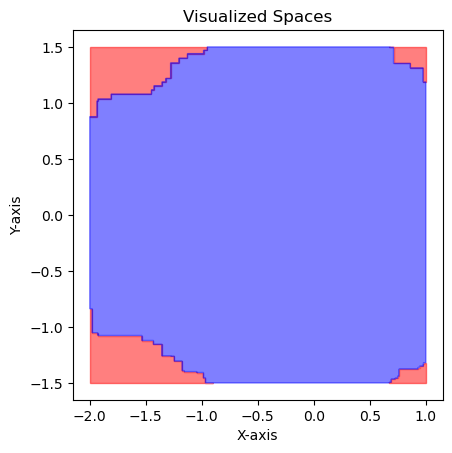

circle 2
beta = 7
part0代码运行时间: 0.2122349739074707秒
part1代码运行时间: 0.2409510612487793秒
part2,adjust代码运行时间: 0.11671090126037598秒
Adjusted Inside Mandelbrot Set Area: 0.0
Adjusted Boundary of Mandelbrot Set Area: 7.645550020377713
Adjusted Outside Mandelbrot Set Area: 0.6065542770004467
Mandelbrot set 0.0


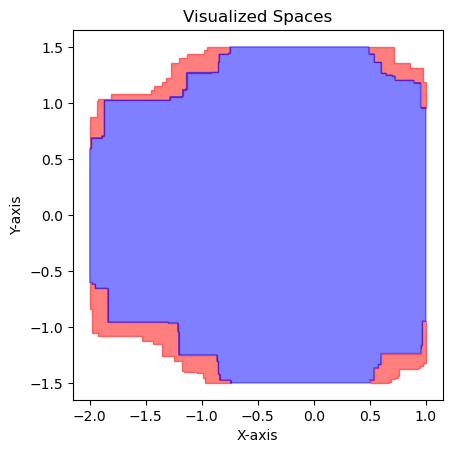

circle 3
beta = 7.3500000000000005
part0代码运行时间: 0.21482038497924805秒
part1代码运行时间: 0.2187671661376953秒
part2,adjust代码运行时间: 0.23682093620300293秒
Adjusted Inside Mandelbrot Set Area: 0.0
Adjusted Boundary of Mandelbrot Set Area: 6.796865517256426
Adjusted Outside Mandelbrot Set Area: 0.8486845031212773
Mandelbrot set 0.0


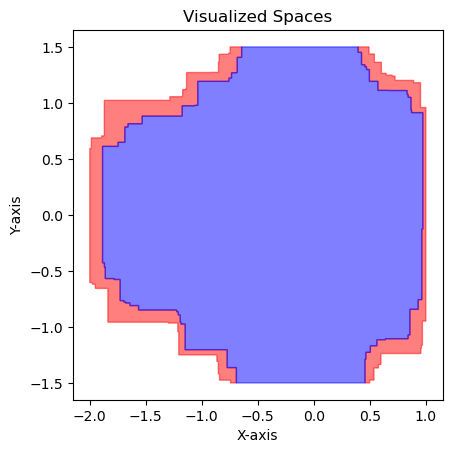

circle 4
beta = 7.717500000000001
part0代码运行时间: 0.2456207275390625秒
part1代码运行时间: 0.16929149627685547秒
part2,adjust代码运行时间: 0.0293118953704834秒
Adjusted Inside Mandelbrot Set Area: 0.0055451212888839654
Adjusted Boundary of Mandelbrot Set Area: 5.777987690505323
Adjusted Outside Mandelbrot Set Area: 1.013332705462209
Mandelbrot set 0.0055451212888839654


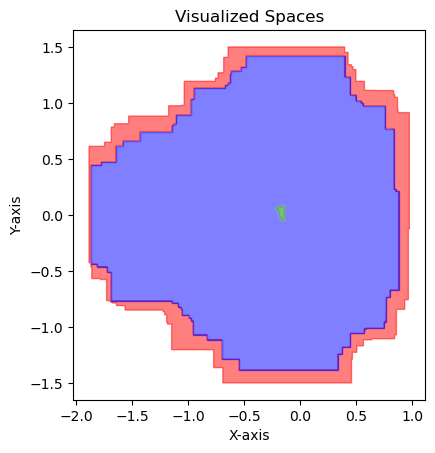

circle 5
beta = 8.103375000000002
part0代码运行时间: 0.34050893783569336秒
part1代码运行时间: 0.1409454345703125秒
part2,adjust代码运行时间: 0.018618345260620117秒
Adjusted Inside Mandelbrot Set Area: 0.10881789871276903
Adjusted Boundary of Mandelbrot Set Area: 4.729997000400282
Adjusted Outside Mandelbrot Set Area: 0.939172791392278
Mandelbrot set 0.11436302000165299


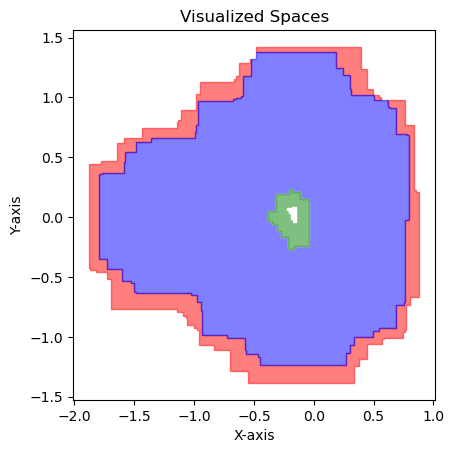

circle 6
beta = 8.508543750000001
part0代码运行时间: 0.3834719657897949秒
part1代码运行时间: 0.12665152549743652秒
part2,adjust代码运行时间: 0.018097877502441406秒
Adjusted Inside Mandelbrot Set Area: 0.12409665739629216
Adjusted Boundary of Mandelbrot Set Area: 3.677695285157216
Adjusted Outside Mandelbrot Set Area: 0.9282050578467743
Mandelbrot set 0.23845967739794516


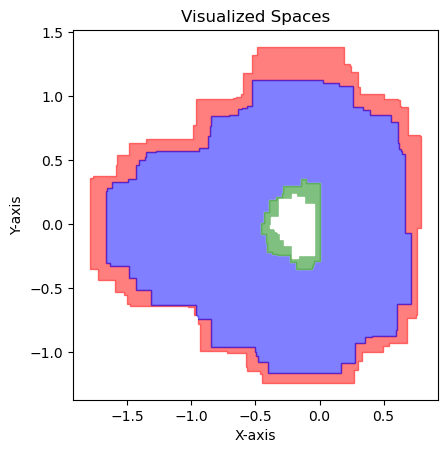

circle 7
beta = 8.933970937500002
part0代码运行时间: 0.4129157066345215秒
part1代码运行时间: 0.21762847900390625秒
part2,adjust代码运行时间: 0.011020898818969727秒
Adjusted Inside Mandelbrot Set Area: 0.19112402204004672
Adjusted Boundary of Mandelbrot Set Area: 2.8026007965927193
Adjusted Outside Mandelbrot Set Area: 0.6839704665244515
Mandelbrot set 0.4295836994379919


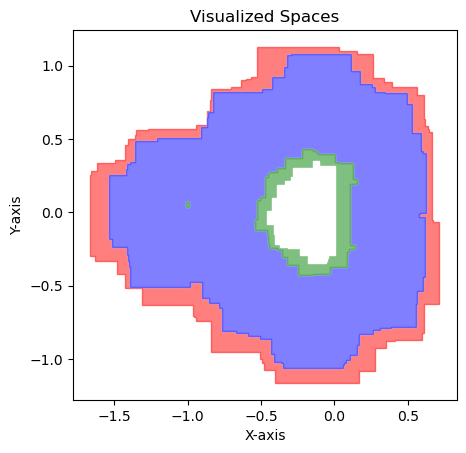

circle 8
beta = 8.040573843750002
part0代码运行时间: 0.4712851047515869秒
part1代码运行时间: 0.1243128776550293秒
part2,adjust代码运行时间: 0.0166471004486084秒
Adjusted Inside Mandelbrot Set Area: 0.08953624329162393
Adjusted Boundary of Mandelbrot Set Area: 2.46036947779355
Adjusted Outside Mandelbrot Set Area: 0.2526950755075436
Mandelbrot set 0.5191199427296158


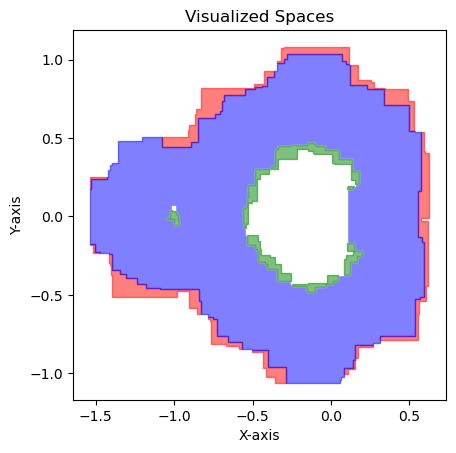

circle 9
beta = 8.442602535937501
part0代码运行时间: 0.5703895092010498秒
part1代码运行时间: 0.11474919319152832秒
part2,adjust代码运行时间: 0.03678584098815918秒
Adjusted Inside Mandelbrot Set Area: 0.1473053381220093
Adjusted Boundary of Mandelbrot Set Area: 2.0627257420944516
Adjusted Outside Mandelbrot Set Area: 0.25033839757709303
Mandelbrot set 0.6664252808516251


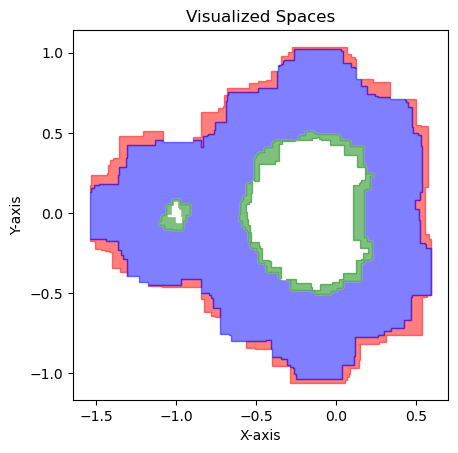

circle 10
beta = 7.598342282343752
part0代码运行时间: 0.6248502731323242秒
part1代码运行时间: 0.12097501754760742秒
part2,adjust代码运行时间: 0.024671316146850586秒
Adjusted Inside Mandelbrot Set Area: 0.035980621575945934
Adjusted Boundary of Mandelbrot Set Area: 1.9296555060698248
Adjusted Outside Mandelbrot Set Area: 0.09708961444867799
Mandelbrot set 0.7024059024275711


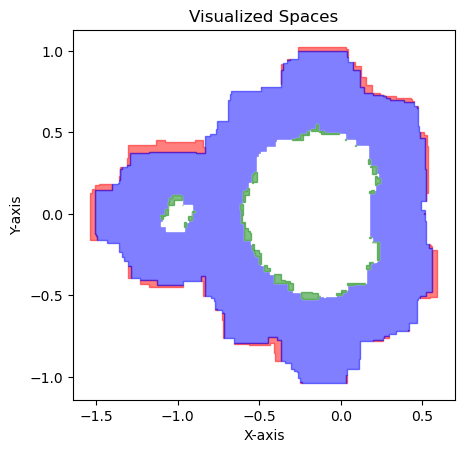

circle 11
beta = 7.978259396460939
part0代码运行时间: 0.6532666683197021秒
part1代码运行时间: 0.12875795364379883秒
part2,adjust代码运行时间: 0.027845382690429688秒
Adjusted Inside Mandelbrot Set Area: 0.06274829416821262
Adjusted Boundary of Mandelbrot Set Area: 1.716636225818381
Adjusted Outside Mandelbrot Set Area: 0.15027098608323364
Mandelbrot set 0.7651541965957837


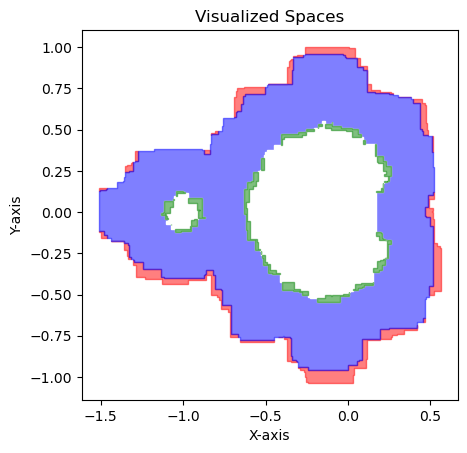

circle 12
beta = 8.377172366283986
part0代码运行时间: 0.6749932765960693秒
part1代码运行时间: 0.12113189697265625秒
part2,adjust代码运行时间: 0.04692196846008301秒
Adjusted Inside Mandelbrot Set Area: 0.1092750076341507
Adjusted Boundary of Mandelbrot Set Area: 1.4526110075961114
Adjusted Outside Mandelbrot Set Area: 0.15475021058811397
Mandelbrot set 0.8744292042299343


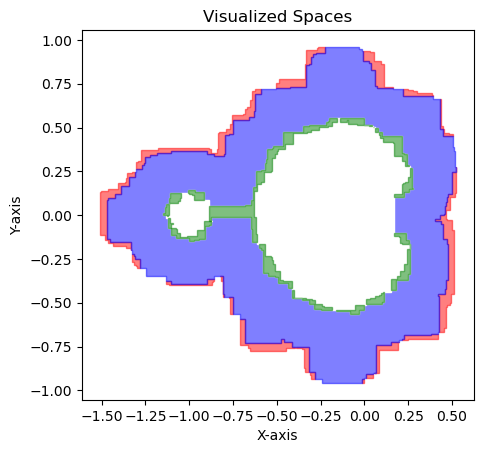

circle 13
beta = 7.539455129655588
part0代码运行时间: 0.8417894840240479秒
part1代码运行时间: 0.12647509574890137秒
part2,adjust代码运行时间: 0.09057259559631348秒
Adjusted Inside Mandelbrot Set Area: 0.0501430502607499
Adjusted Boundary of Mandelbrot Set Area: 1.3531886338154346
Adjusted Outside Mandelbrot Set Area: 0.0492793235199302
Mandelbrot set 0.9245722544906843


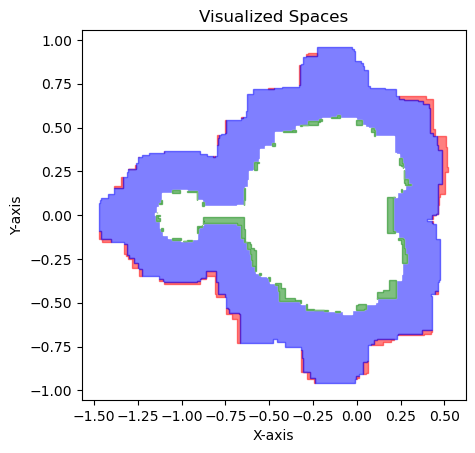

circle 14
beta = 7.916427886138368
part0代码运行时间: 0.8432190418243408秒
part1代码运行时间: 0.20725011825561523秒
part2,adjust代码运行时间: 0.10993719100952148秒
Adjusted Inside Mandelbrot Set Area: 0.0367976373599713
Adjusted Boundary of Mandelbrot Set Area: 1.2212929377603094
Adjusted Outside Mandelbrot Set Area: 0.09509805869515525
Mandelbrot set 0.9613698918506556


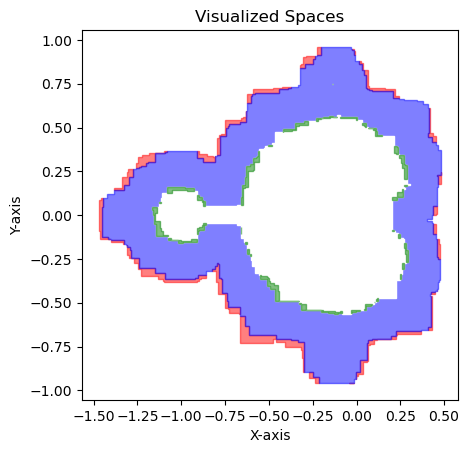

circle 15
beta = 8.312249280445286
part0代码运行时间: 0.8434302806854248秒
part1代码运行时间: 0.13283872604370117秒
part2,adjust代码运行时间: 0.05845475196838379秒
Adjusted Inside Mandelbrot Set Area: 0.06464526050825363
Adjusted Boundary of Mandelbrot Set Area: 1.0585806411468792
Adjusted Outside Mandelbrot Set Area: 0.09806703610517556
Mandelbrot set 1.0260151523589092


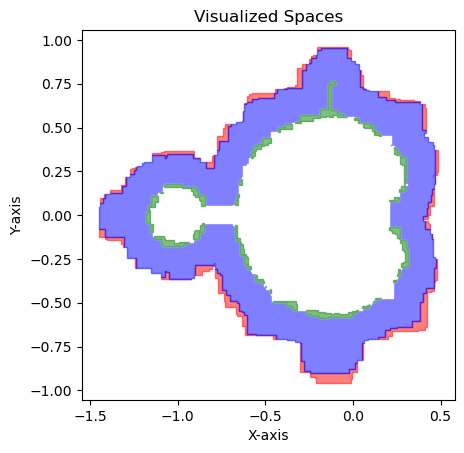

circle 16
beta = 7.481024352400758
part0代码运行时间: 0.9989783763885498秒
part1代码运行时间: 0.13459444046020508秒
part2,adjust代码运行时间: 0.19070196151733398秒
Adjusted Inside Mandelbrot Set Area: 0.0306901402707036
Adjusted Boundary of Mandelbrot Set Area: 0.9856934499111656
Adjusted Outside Mandelbrot Set Area: 0.042197050965011154
Mandelbrot set 1.0567052926296128


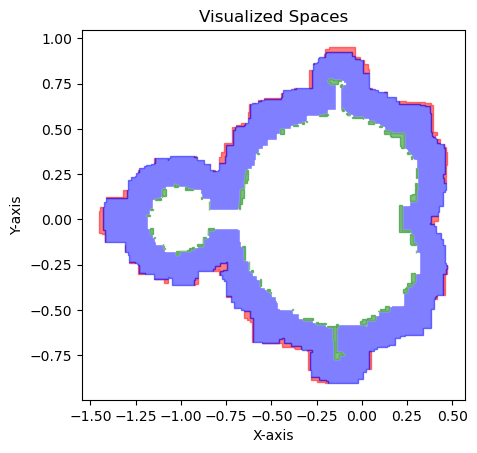

circle 17
beta = 7.855075570020796
part0代码运行时间: 0.9686048030853271秒
part1代码运行时间: 0.14796233177185059秒
part2,adjust代码运行时间: 0.056220293045043945秒
Adjusted Inside Mandelbrot Set Area: 0.040750396661853636
Adjusted Boundary of Mandelbrot Set Area: 0.8927947739091284
Adjusted Outside Mandelbrot Set Area: 0.052148279340180605
Mandelbrot set 1.0974556892914664


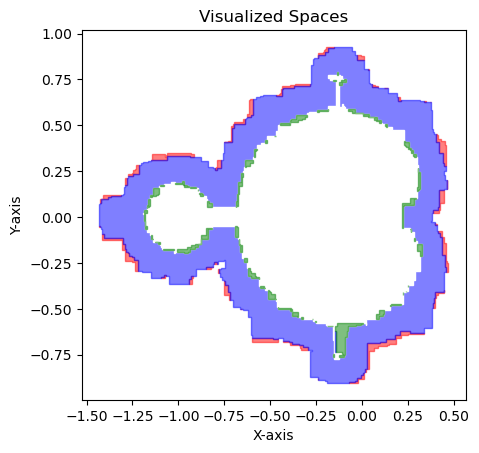

circle 18
beta = 8.247829348521837
part0代码运行时间: 1.114250898361206秒
part1代码运行时间: 0.14565420150756836秒
part2,adjust代码运行时间: 0.191300630569458秒
Adjusted Inside Mandelbrot Set Area: 0.06459360808911298
Adjusted Boundary of Mandelbrot Set Area: 0.7676740854993126
Adjusted Outside Mandelbrot Set Area: 0.06052708032070504
Mandelbrot set 1.1620492973805794


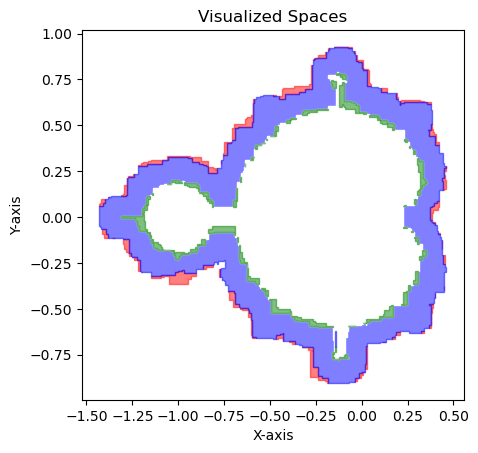

circle 19
beta = 7.4230464136696535
part0代码运行时间: 1.1692609786987305秒
part1代码运行时间: 0.13903188705444336秒
part2,adjust代码运行时间: 0.06760382652282715秒
Adjusted Inside Mandelbrot Set Area: 0.027932717242214928
Adjusted Boundary of Mandelbrot Set Area: 0.7061156015943237
Adjusted Outside Mandelbrot Set Area: 0.03362576666276886
Mandelbrot set 1.1899820146227944


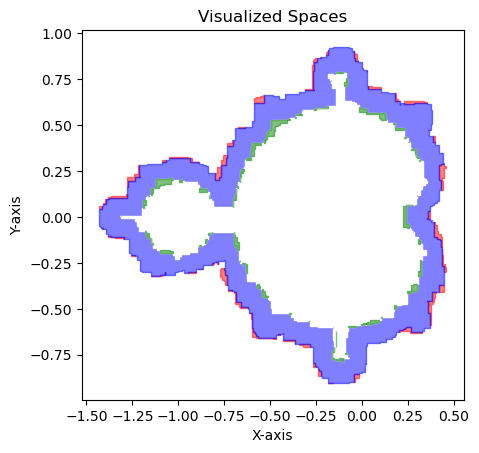

circle 20
beta = 7.794198734353136
part0代码运行时间: 1.318164348602295秒
part1代码运行时间: 0.14171123504638672秒
part2,adjust代码运行时间: 0.21657037734985352秒
Adjusted Inside Mandelbrot Set Area: 0.02895464119831293
Adjusted Boundary of Mandelbrot Set Area: 0.6385778977366432
Adjusted Outside Mandelbrot Set Area: 0.03858306265937334
Mandelbrot set 1.2189366558211074


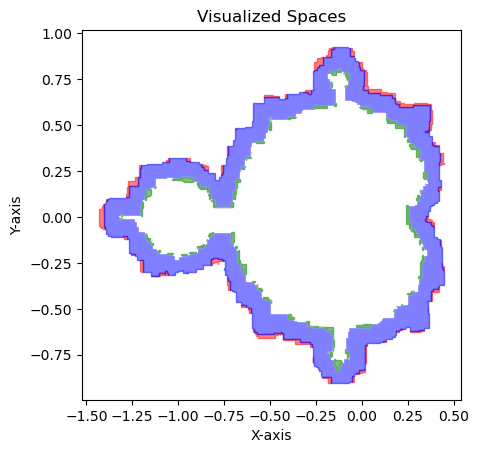

circle 21
beta = 8.183908671070794
part0代码运行时间: 1.2986140251159668秒
part1代码运行时间: 0.14249348640441895秒
part2,adjust代码运行时间: 0.09925961494445801秒
Adjusted Inside Mandelbrot Set Area: 0.030910020968110928
Adjusted Boundary of Mandelbrot Set Area: 0.5589220942839405
Adjusted Outside Mandelbrot Set Area: 0.048745782484592395
Mandelbrot set 1.2498466767892185


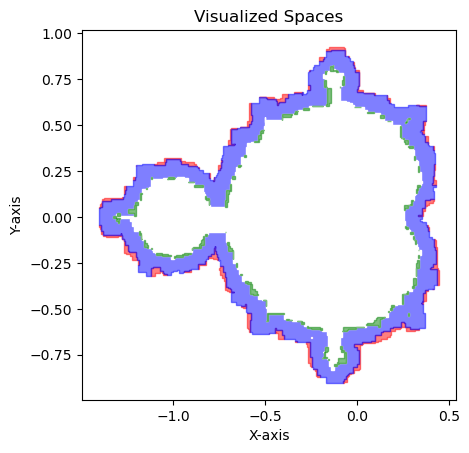

circle 22
beta = 7.365517803963715
part0代码运行时间: 1.8846757411956787秒
part1代码运行时间: 0.1645827293395996秒
part2,adjust代码运行时间: 0.11434125900268555秒
Adjusted Inside Mandelbrot Set Area: 0.019725759999970935
Adjusted Boundary of Mandelbrot Set Area: 0.5209270362081625
Adjusted Outside Mandelbrot Set Area: 0.018269298075807464
Mandelbrot set 1.2695724367891894


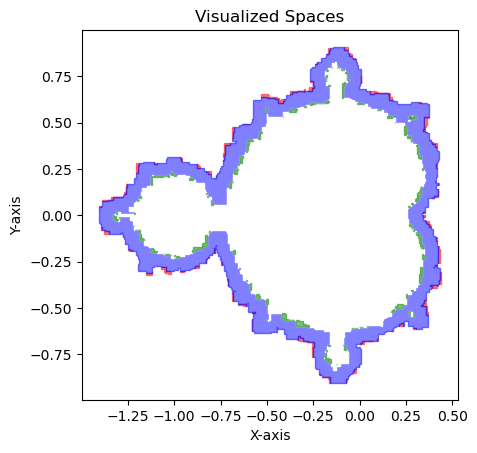

circle 23
beta = 7.733793694161901
part0代码运行时间: 2.091841697692871秒
part1代码运行时间: 0.15502691268920898秒
part2,adjust代码运行时间: 0.12041378021240234秒
Adjusted Inside Mandelbrot Set Area: 0.025167066327529353
Adjusted Boundary of Mandelbrot Set Area: 0.46346335775382597
Adjusted Outside Mandelbrot Set Area: 0.032296612126805416
Mandelbrot set 1.2947395031167188


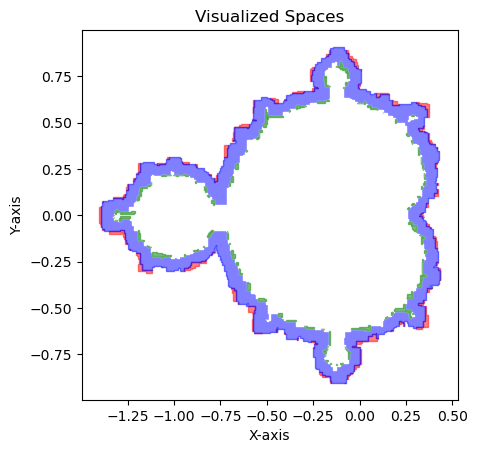

circle 24
beta = 6.96041432474571
part0代码运行时间: 2.421781063079834秒
part1代码运行时间: 0.2689049243927002秒
part2,adjust代码运行时间: 0.15034842491149902秒
Adjusted Inside Mandelbrot Set Area: 0.010216625563957514
Adjusted Boundary of Mandelbrot Set Area: 0.44310130015475185
Adjusted Outside Mandelbrot Set Area: 0.01014543203511525
Mandelbrot set 1.3049561286806763


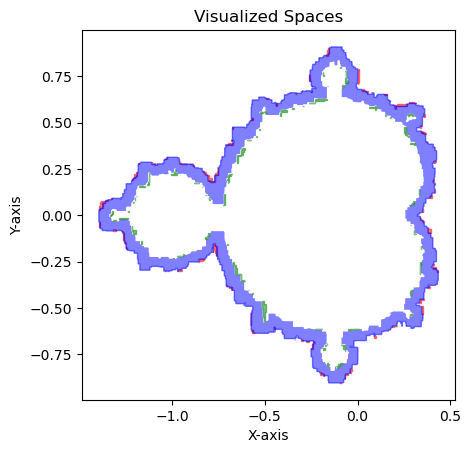

circle 25
beta = 7.308435040982996
part0代码运行时间: 2.487844705581665秒
part1代码运行时间: 0.1639103889465332秒
part2,adjust代码运行时间: 0.15182971954345703秒
Adjusted Inside Mandelbrot Set Area: 0.013227356566588572
Adjusted Boundary of Mandelbrot Set Area: 0.41017361603626445
Adjusted Outside Mandelbrot Set Area: 0.019668967548656914
Mandelbrot set 1.318183485247265


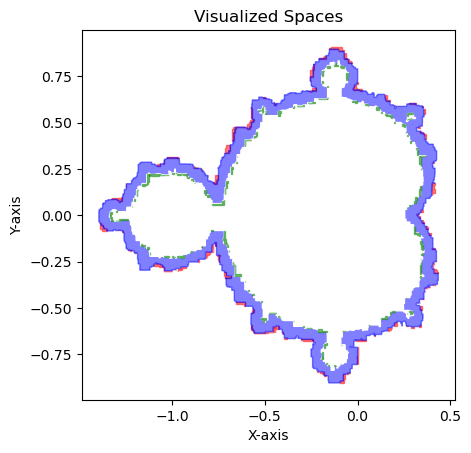

circle 26
beta = 7.673856793032146
part0代码运行时间: 2.597949266433716秒
part1代码运行时间: 0.16546010971069336秒
part2,adjust代码运行时间: 0.1650996208190918秒
Adjusted Inside Mandelbrot Set Area: 0.02526831619827288
Adjusted Boundary of Mandelbrot Set Area: 0.3649683881797345
Adjusted Outside Mandelbrot Set Area: 0.0199291514921768
Mandelbrot set 1.3434518014455379


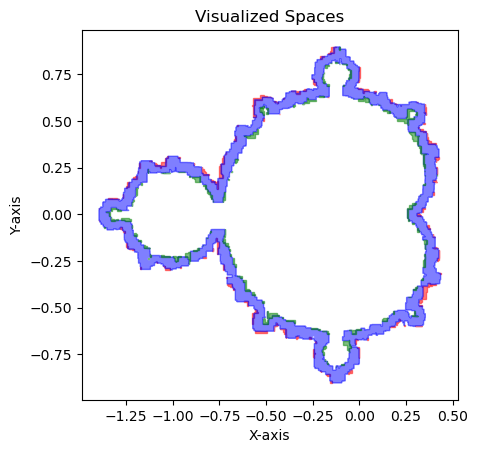

circle 27
beta = 6.906471113728932
part0代码运行时间: 2.8170440196990967秒
part1代码运行时间: 0.17496418952941895秒
part2,adjust代码运行时间: 0.17305660247802734秒
Adjusted Inside Mandelbrot Set Area: 0.011549450790481645
Adjusted Boundary of Mandelbrot Set Area: 0.3392828020353973
Adjusted Outside Mandelbrot Set Area: 0.014135662655642606
Mandelbrot set 1.3550012522360195


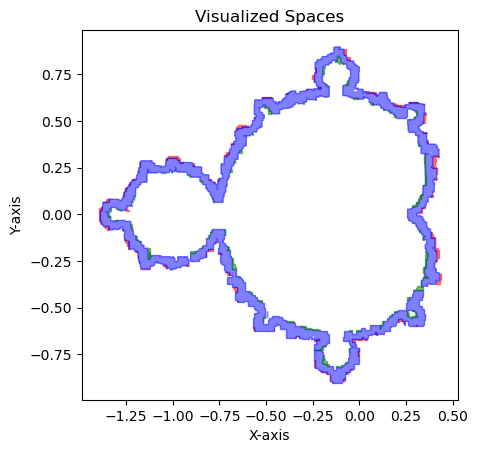

circle 28
beta = 7.2517946694153785
part0代码运行时间: 1.9594337940216064秒
part1代码运行时间: 0.17204999923706055秒
part2,adjust代码运行时间: 0.19411444664001465秒
Adjusted Inside Mandelbrot Set Area: 0.014375878295608057
Adjusted Boundary of Mandelbrot Set Area: 0.30796017470292464
Adjusted Outside Mandelbrot Set Area: 0.016832962722400164
Mandelbrot set 1.3693771305316276


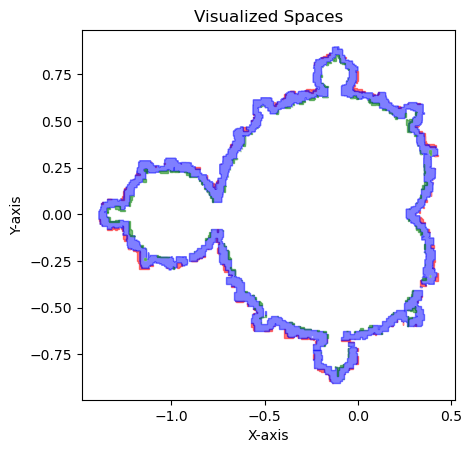

circle 29
beta = 7.614384402886148
part0代码运行时间: 2.2264201641082764秒
part1代码运行时间: 0.1833035945892334秒
part2,adjust代码运行时间: 0.20937681198120117秒
Adjusted Inside Mandelbrot Set Area: 0.021474557581957654
Adjusted Boundary of Mandelbrot Set Area: 0.2626377812319041
Adjusted Outside Mandelbrot Set Area: 0.023420043810950437
Mandelbrot set 1.3908516881135853


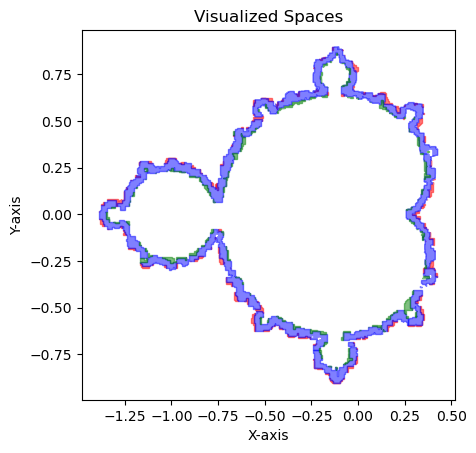

circle 30
beta = 6.852945962597533
part0代码运行时间: 1.350588083267212秒
part1代码运行时间: 0.18993878364562988秒
part2,adjust代码运行时间: 0.22488117218017578秒
Adjusted Inside Mandelbrot Set Area: 0.015733358704705342
Adjusted Boundary of Mandelbrot Set Area: 0.23097158025688885
Adjusted Outside Mandelbrot Set Area: 0.015672449523982855
Mandelbrot set 1.4065850468182906


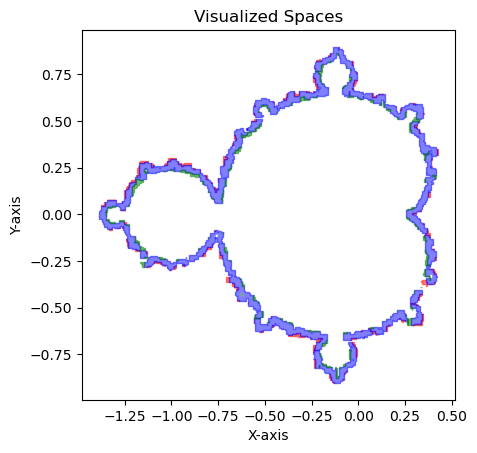

circle 31
beta = 6.16765136633778
part0代码运行时间: 0.7787086963653564秒
part1代码运行时间: 0.20498085021972656秒
part2,adjust代码运行时间: 0.27438950538635254秒
Adjusted Inside Mandelbrot Set Area: 0.008842511449251774
Adjusted Boundary of Mandelbrot Set Area: 0.2106196382020819
Adjusted Outside Mandelbrot Set Area: 0.01100709769161354
Mandelbrot set 1.4154275582675424


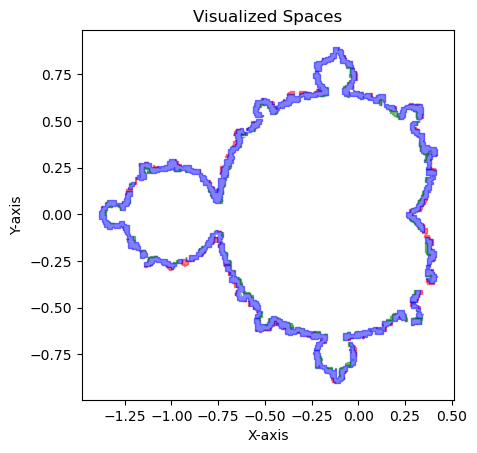

circle 32
beta = 6.476033934654669
part0代码运行时间: 0.6651475429534912秒
part1代码运行时间: 0.20640873908996582秒
part2,adjust代码运行时间: 0.31145572662353516秒
Adjusted Inside Mandelbrot Set Area: 0.012045358452183274
Adjusted Boundary of Mandelbrot Set Area: 0.17878517663312093
Adjusted Outside Mandelbrot Set Area: 0.01943632127831522
Mandelbrot set 1.4274729167197258


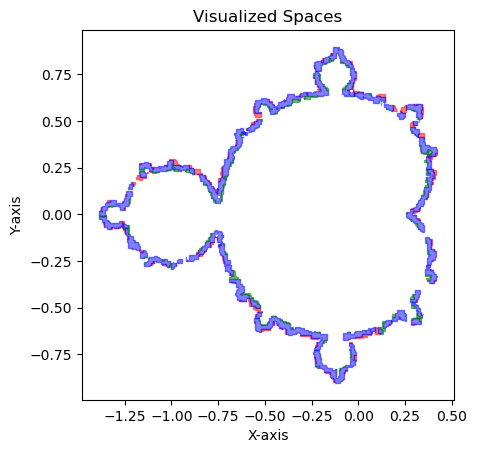

circle 33
beta = 5.828430541189203
part0代码运行时间: 0.5951104164123535秒
part1代码运行时间: 0.21987080574035645秒
part2,adjust代码运行时间: 0.3249039649963379秒
Adjusted Inside Mandelbrot Set Area: 0.010587875248555947
Adjusted Boundary of Mandelbrot Set Area: 0.1557819764400965
Adjusted Outside Mandelbrot Set Area: 0.01168164570543485
Mandelbrot set 1.4380607919682817


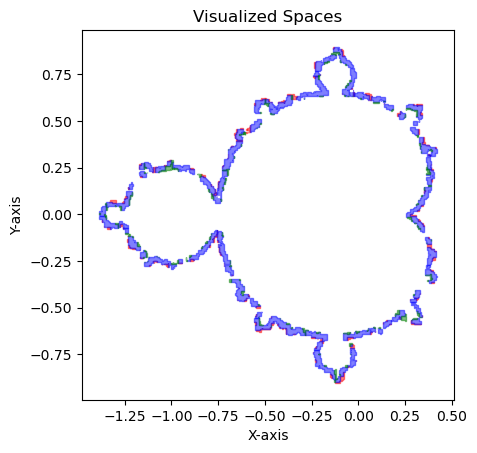

circle 34
beta = 5.245587487070282
part0代码运行时间: 0.5030815601348877秒
part1代码运行时间: 0.22489571571350098秒
part2,adjust代码运行时间: 0.3753542900085449秒
Adjusted Inside Mandelbrot Set Area: 0.007154277516927851
Adjusted Boundary of Mandelbrot Set Area: 0.1408095898911815
Adjusted Outside Mandelbrot Set Area: 0.007453837644871687
Mandelbrot set 1.4452150694852095


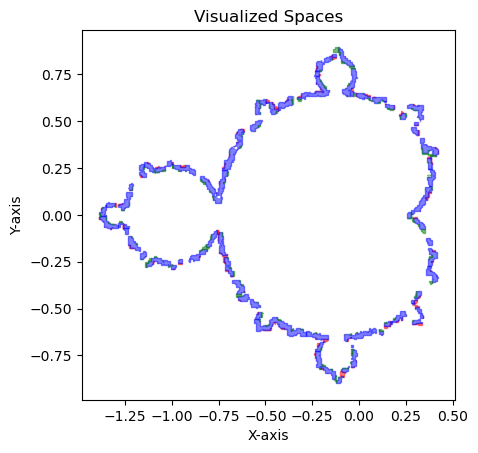

circle 35
beta = 4.7210287383632545
part0代码运行时间: 0.4685940742492676秒
part1代码运行时间: 0.19989967346191406秒
part2,adjust代码运行时间: 0.37432026863098145秒
Adjusted Inside Mandelbrot Set Area: 0.004277193939527134
Adjusted Boundary of Mandelbrot Set Area: 0.1314050296620159
Adjusted Outside Mandelbrot Set Area: 0.004671002807562345
Mandelbrot set 1.4494922634247367


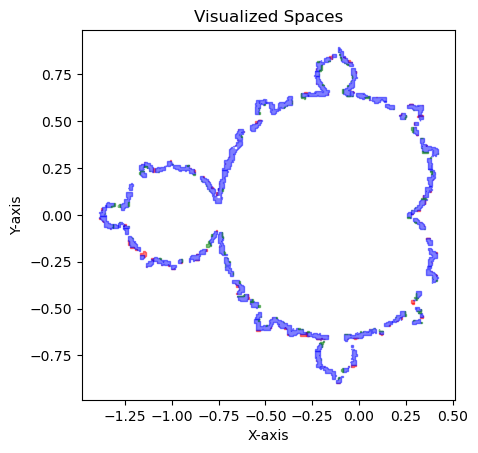

circle 36
beta = 4.957080175281417
part0代码运行时间: 0.5430371761322021秒
part1代码运行时间: 0.21865296363830566秒
part2,adjust代码运行时间: 0.36455297470092773秒
Adjusted Inside Mandelbrot Set Area: 0.008592840559110292
Adjusted Boundary of Mandelbrot Set Area: 0.11545103925214396
Adjusted Outside Mandelbrot Set Area: 0.006979100763437969
Mandelbrot set 1.458085103983847


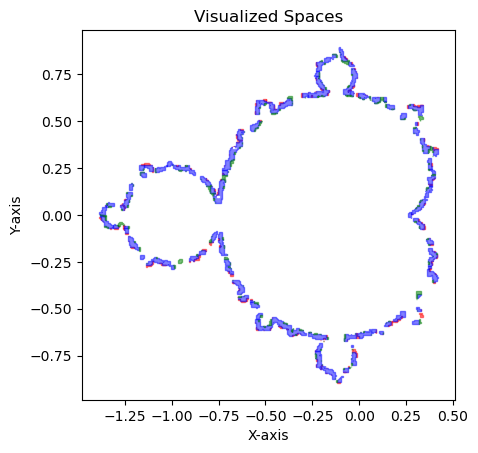

circle 37
beta = 4.461372157753276
part0代码运行时间: 0.4228236675262451秒
part1代码运行时间: 0.22414016723632812秒
part2,adjust代码运行时间: 0.36165380477905273秒
Adjusted Inside Mandelbrot Set Area: 0.005224633286712205
Adjusted Boundary of Mandelbrot Set Area: 0.10386377535291433
Adjusted Outside Mandelbrot Set Area: 0.006042110678400374
Mandelbrot set 1.4633097372705592


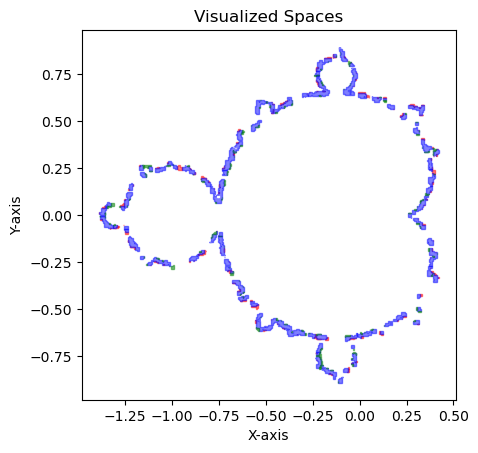

circle 38
beta = 4.0152349419779485
part0代码运行时间: 0.4409797191619873秒
part1代码运行时间: 0.21029949188232422秒
part2,adjust代码运行时间: 0.36836767196655273秒
Adjusted Inside Mandelbrot Set Area: 0.00456232327584128
Adjusted Boundary of Mandelbrot Set Area: 0.095219946863125
Adjusted Outside Mandelbrot Set Area: 0.0038100970737258142
Mandelbrot set 1.4678720605464006


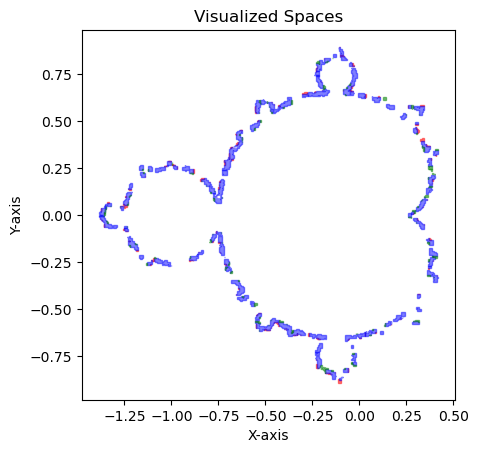

circle 39
beta = 4.215996689076846
part0代码运行时间: 0.47942662239074707秒
part1代码运行时间: 0.20572209358215332秒
part2,adjust代码运行时间: 0.3831326961517334秒
Adjusted Inside Mandelbrot Set Area: 0.006037369041509085
Adjusted Boundary of Mandelbrot Set Area: 0.08222919973430085
Adjusted Outside Mandelbrot Set Area: 0.006255586463833533
Mandelbrot set 1.4739094295879096


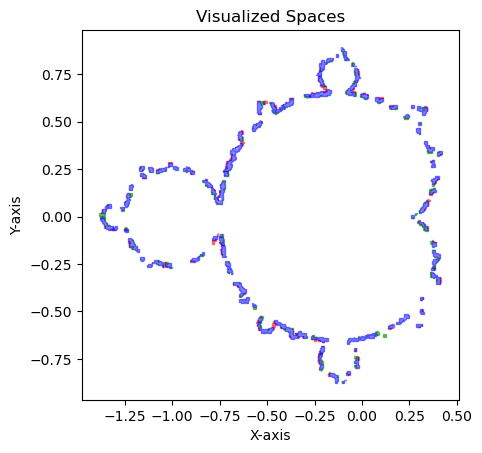

circle 40
beta = 3.7943970201691615
part0代码运行时间: 0.45714616775512695秒
part1代码运行时间: 0.40838146209716797秒
part2,adjust代码运行时间: 0.3559861183166504秒
Adjusted Inside Mandelbrot Set Area: 0.004402016792118385
Adjusted Boundary of Mandelbrot Set Area: 0.0736743993866617
Adjusted Outside Mandelbrot Set Area: 0.0037189330968004134
Mandelbrot set 1.478311446380028


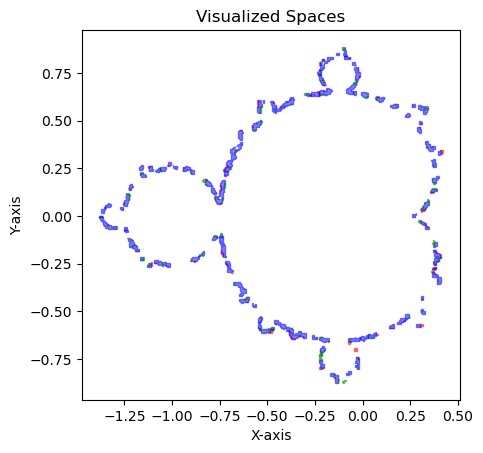

circle 41
beta = 3.4149573181522452
part0代码运行时间: 0.4598572254180908秒
part1代码运行时间: 0.22621536254882812秒
part2,adjust代码运行时间: 0.36113595962524414秒
Adjusted Inside Mandelbrot Set Area: 0.0033386090588498375
Adjusted Boundary of Mandelbrot Set Area: 0.06729457556212157
Adjusted Outside Mandelbrot Set Area: 0.0028988029434927555
Mandelbrot set 1.4816500554388778


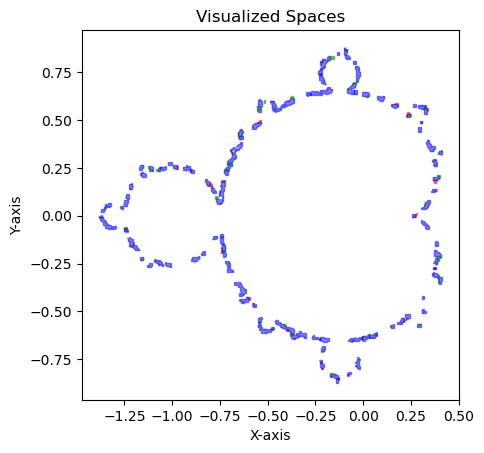

circle 42
beta = 3.5857051840598575
part0代码运行时间: 0.4637744426727295秒
part1代码运行时间: 0.22488713264465332秒
part2,adjust代码运行时间: 0.3916037082672119秒
Adjusted Inside Mandelbrot Set Area: 0.004434855600222182
Adjusted Boundary of Mandelbrot Set Area: 0.0577885581354455
Adjusted Outside Mandelbrot Set Area: 0.004321692816859714
Mandelbrot set 1.4860849110391001


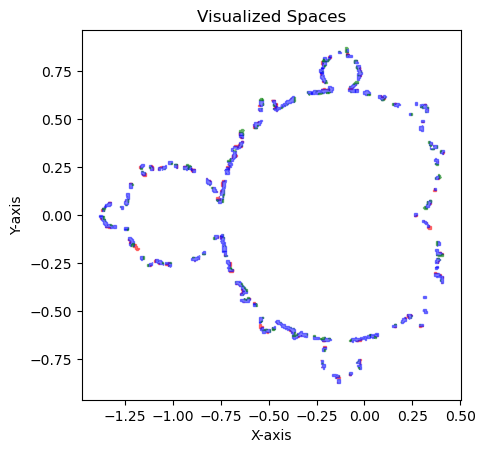

circle 43
beta = 3.227134665653872
part0代码运行时间: 0.4317643642425537秒
part1代码运行时间: 0.24152469635009766秒
part2,adjust代码运行时间: 0.37656497955322266秒
Adjusted Inside Mandelbrot Set Area: 0.0029622729217657342
Adjusted Boundary of Mandelbrot Set Area: 0.05051197047352007
Adjusted Outside Mandelbrot Set Area: 0.003794658084490367
Mandelbrot set 1.4890471839608659


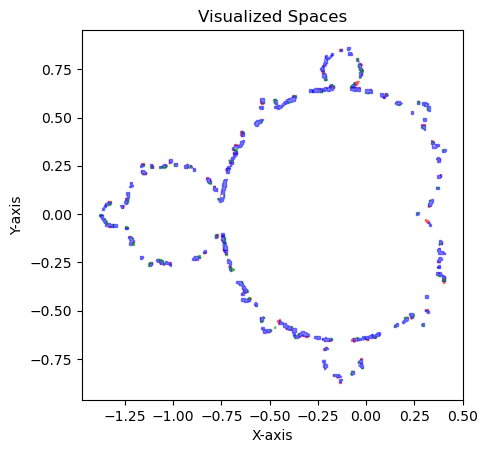

circle 44
beta = 2.904421199088485
part0代码运行时间: 0.42421913146972656秒
part1代码运行时间: 0.21666979789733887秒
part2,adjust代码运行时间: 0.37311410903930664秒
Adjusted Inside Mandelbrot Set Area: 0.0031421358791133436
Adjusted Boundary of Mandelbrot Set Area: 0.04414847869563509
Adjusted Outside Mandelbrot Set Area: 0.002870936603923323
Mandelbrot set 1.4921893198399792


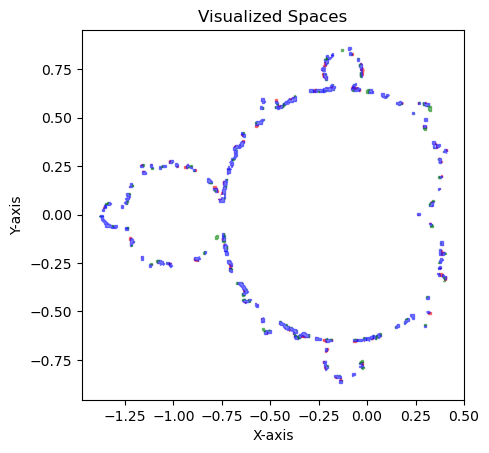

circle 45
beta = 2.6139790791796367
part0代码运行时间: 0.4867725372314453秒
part1代码运行时间: 0.2234337329864502秒
part2,adjust代码运行时间: 0.37634754180908203秒
Adjusted Inside Mandelbrot Set Area: 0.001818206354146234
Adjusted Boundary of Mandelbrot Set Area: 0.04007719299941029
Adjusted Outside Mandelbrot Set Area: 0.001976202081180069
Mandelbrot set 1.4940075261941255


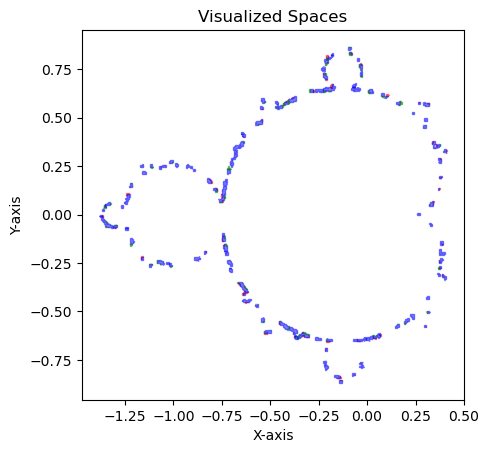

circle 46
beta = 2.7446780331386185
part0代码运行时间: 0.4129292964935303秒
part1代码运行时间: 0.22047734260559082秒
part2,adjust代码运行时间: 0.356001615524292秒
Adjusted Inside Mandelbrot Set Area: 0.002577634491687761
Adjusted Boundary of Mandelbrot Set Area: 0.03428081851892539
Adjusted Outside Mandelbrot Set Area: 0.002742614386120702
Mandelbrot set 1.4965851606858132


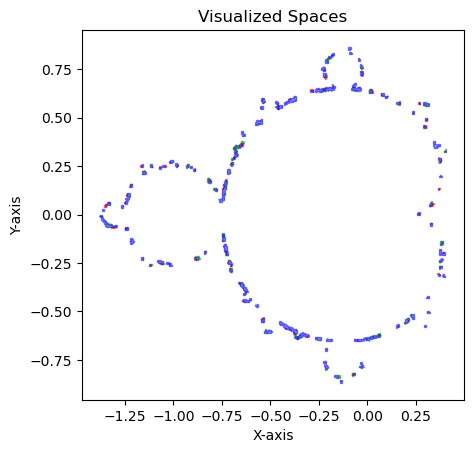

circle 47
beta = 2.470210229824757
part0代码运行时间: 0.4369997978210449秒
part1代码运行时间: 0.2115614414215088秒
part2,adjust代码运行时间: 0.3669102191925049秒
Adjusted Inside Mandelbrot Set Area: 0.002020266039857208
Adjusted Boundary of Mandelbrot Set Area: 0.029569542500533043
Adjusted Outside Mandelbrot Set Area: 0.002173183928463127
Mandelbrot set 1.4986054267256703


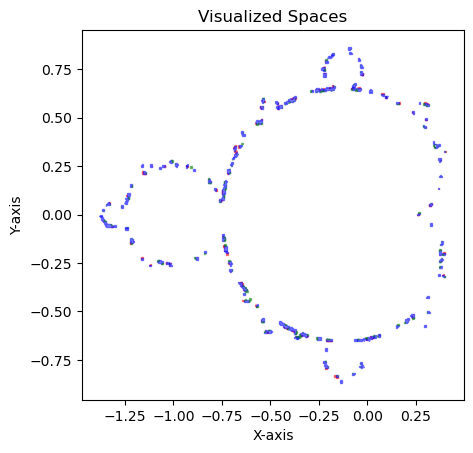

circle 48
beta = 2.223189206842281
part0代码运行时间: 0.408297061920166秒
part1代码运行时间: 0.2177267074584961秒
part2,adjust代码运行时间: 0.3403449058532715秒
Adjusted Inside Mandelbrot Set Area: 0.0013538404189411717
Adjusted Boundary of Mandelbrot Set Area: 0.026050894050586006
Adjusted Outside Mandelbrot Set Area: 0.0017156571911630043
Mandelbrot set 1.4999592671446116


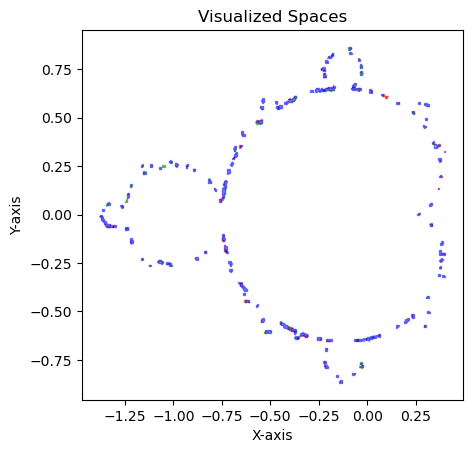

circle 49
beta = 2.000870286158053
part0代码运行时间: 0.3828389644622803秒
part1代码运行时间: 0.22048544883728027秒
part2,adjust代码运行时间: 0.3334927558898926秒
Adjusted Inside Mandelbrot Set Area: 0.0009426465587310771
Adjusted Boundary of Mandelbrot Set Area: 0.023182932254651484
Adjusted Outside Mandelbrot Set Area: 0.0015067225095687139
Mandelbrot set 1.5009019137033426


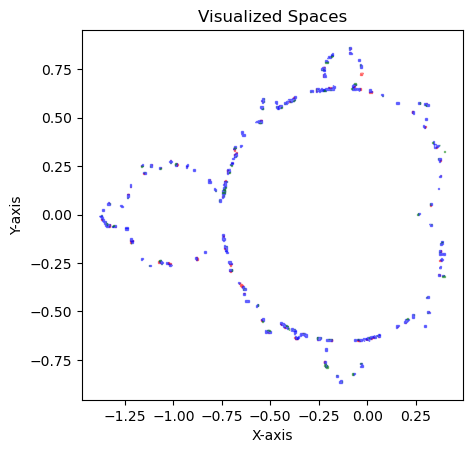

circle 50
beta = 2.100913800465956
part0代码运行时间: 0.37338733673095703秒
part1代码运行时间: 0.22391343116760254秒
part2,adjust代码运行时间: 0.3224024772644043秒
Adjusted Inside Mandelbrot Set Area: 0.0015073077816170019
Adjusted Boundary of Mandelbrot Set Area: 0.019337616621622672
Adjusted Outside Mandelbrot Set Area: 0.0017676524601025843
Mandelbrot set 1.5024092214849596


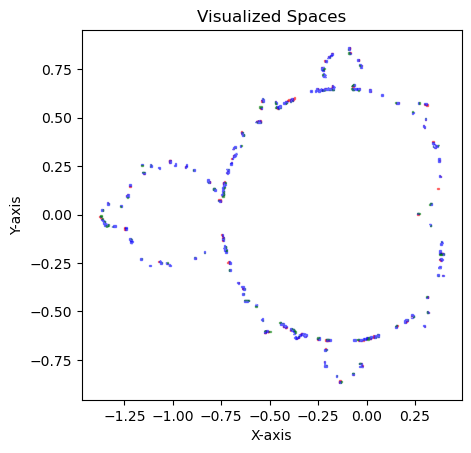

Mandelbrot set 1.5099160842574735


In [96]:
x_range = [-2, 1]
y_range = [-1.5, 1.5]
num_samples = 2000
max_iter = 2000
init_area_of_sample = (x_range[1] - x_range[0]) * (y_range[1] - y_range[0])
init_space = MultiPolygon([box(x_range[0], y_range[0], x_range[1], y_range[1])])


sampletime = 50
aim_samplesize = []
true_samplesize = []
inside = []
outside = []
boundary = []
beta = 7
last_sample = 1
unknowarea = 0
for i in range(sampletime):
    if i == 0:
        current_sample_space = init_space
        current_area_size = init_area_of_sample
    else:
        current_sample_space = adjusted_boundary_space
        current_area_size = adjusted_boundary_space.area

    aim_samplesize.append(current_sample_space)
    iteration_threshold = (i + 1) * 5
    print(f"circle {i+1}")

    if i > 1 : 
        if adjusted_inside_space.area / current_area_size <= 0.05:
            beta *= 1.05
        else:
            beta *= 0.9
    print(f"beta = {beta}")
    side_length = current_area_size / beta

    

    start_time = time.time() 
    #print(current_sample_space)
    inside_mandelbrot, boundary_points , outside_mandelbrot= random_sampling(current_sample_space, 
                                                    num_samples, max_iter, iteration_threshold)

    end_time = time.time()  # 结束时间
    elapsed_time = end_time - start_time  # 计算经过的时间

    print(f"part0代码运行时间: {elapsed_time}秒")


    """
    plt.figure(figsize=(10, 10))

    # Plot each set of points with different colors
    plt.scatter(inside_mandelbrot.real, inside_mandelbrot.imag, color='green', s=0.5, label='Inside Mandelbrot')
    plt.scatter(boundary_points.real, boundary_points.imag, color='blue', s=0.5, label='Boundary of Mandelbrot')
    plt.scatter(outside_mandelbrot.real, outside_mandelbrot.imag, color='red', s=0.5, label='Outside Mandelbrot')

    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.title('Visualization of the Mandelbrot Set')
    plt.xlabel('Real part')
    plt.ylabel('Imaginary part')
    plt.legend()
    plt.show()
    
    """
    start_time = time.time() 

    inside_mandelbrot_squares = define_regions(inside_mandelbrot, side_length)
    boundary_squares = define_regions(boundary_points, side_length)  # 0.1 is the length of the side of the square area
    outside_mandelbrot_squares = define_regions(outside_mandelbrot, side_length)

    def visualize_regions(squares, color):
        fig, ax = plt.subplots(figsize=(10, 10))

        # Draw each square
        for square in squares:
            left, right, bottom, top = square
            square_patch = plt.Rectangle((left, bottom), right - left, top - bottom, 
                                        edgecolor=color, facecolor='none')
            ax.add_patch(square_patch)

        ax.set_xlim(x_range)
        ax.set_ylim(y_range)
        plt.xlabel('Real part')
        plt.ylabel('Imaginary part')
        plt.title('Regions in the Mandelbrot Set')
        plt.show()

    # Visualize each set of regions
    #visualize_regions(inside_mandelbrot_squares, 'green')
    #visualize_regions(boundary_squares, 'blue')
    #visualize_regions(outside_mandelbrot_squares, 'red')

    #????????????
    inside_space = merge_squares(inside_mandelbrot_squares, current_sample_space)
    boundary_space = merge_squares(boundary_squares, current_sample_space)
    outside_space = merge_squares(outside_mandelbrot_squares, current_sample_space)
    
    #print(inside_space)
    #print(boundary_space)
    #print(current_sample_space)

    end_time = time.time()  # 结束时间
    elapsed_time = end_time - start_time  # 计算经过的时间

    print(f"part1代码运行时间: {elapsed_time}秒")


    start_time = time.time()  # 开始时间


    adjusted_inside_space, adjusted_boundary_space, adjusted_outside_space = adjust_spaces(inside_space,
                                                        boundary_space, outside_space, current_sample_space)
    
    
    end_time = time.time()  # 结束时间
    elapsed_time = end_time - start_time  # 计算经过的时间

    print(f"part2,adjust代码运行时间: {elapsed_time}秒")
    
    inside.append(adjusted_inside_space.area)
    boundary.append(adjusted_boundary_space.area)
    outside.append(adjusted_outside_space.area)
    
    print(f"Adjusted Inside Mandelbrot Set Area: {adjusted_inside_space.area}")
    print(f"Adjusted Boundary of Mandelbrot Set Area: {adjusted_boundary_space.area}")
    print(f"Adjusted Outside Mandelbrot Set Area: {adjusted_outside_space.area}")

    exact_sample_area = adjusted_inside_space.area + adjusted_boundary_space.area + adjusted_outside_space.area
    true_samplesize.append(exact_sample_area)
    print(f"Mandelbrot set {sum(inside)}")

    
    fig, ax = plt.subplots()
    # 可视化三个区域
    
    visualize_space(adjusted_outside_space, ax, color='red')    # 外部空间为红色
    visualize_space(adjusted_boundary_space, ax, color='blue')  # 边界空间为蓝色
    visualize_space(adjusted_inside_space, ax, color='green')   # 内部空间为绿色

    # 设置图像的x和y边界
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Visualized Spaces')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    
    if adjusted_boundary_space.area == 0:
        last_sample = 0
        break
    unknowarea = adjusted_boundary_space
if last_sample == 1:
    print(f"Mandelbrot set {sum(inside) + final_sampling(unknowarea, num_samples*10, max_iter, iteration_threshold)}")
else:
    print(f"Mandelbrot set {sum(inside)}")
